# 결측치, 이상치 처리
## 결측치
### 확인

In [119]:
import matplotlib.pylab as plt
import matplotlib.colors as mcolors
from matplotlib import font_manager, rc
import matplotlib.font_manager as fm
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

plt.rcParams['axes.unicode_minus'] = False

import seaborn as sns

In [420]:

# 모든 컬럼을 표시하도록 설정
pd.set_option("display.max_columns", None)

# 모든 행을 표시하도록 설정 (필요한 경우)
#pd.set_option("display.max_rows", None)

# 가로 스크롤 가능하게 설정 (긴 텍스트 잘림 방지)
pd.set_option("display.width", 1000)


In [591]:
import pandas as pd

df = pd.read_csv('C:/ZIPcoding/dataset0220_real_2.csv', low_memory = False)

In [122]:
pd.DataFrame(df.isna().sum().sort_values(ascending=False))

,0
이전 실거래가,98174
토지면적,72375
건축년도,3044
자치구최근6개월거래량,44
자치구최근6개월평균금액,44
동최근6개월거래량,44
동최근6개월평균금액,44
층,13
건물명,1
수도권아파트입주물량,0


In [125]:

df.isna().sum().sort_values(ascending=False)

이전 실거래가         98174
토지면적            72375
건축년도             3044
자치구최근6개월거래량        44
자치구최근6개월평균금액       44
동최근6개월거래량          44
동최근6개월평균금액         44
층                  13
건물명                 1
수도권아파트입주물량          0
서울5대학군지여부           0
한강변여부               0
고정형 주택담보대출          0
계약연월                0
한국은행 기준금리           0
최근접역                0
최근접역_노선             0
최근접역_연결역개수          0
최근접역_환승역구분          0
최근접역_직선거리           0
최근접역_도로거리           0
접수연도                0
건물면적정수              0
자치구코드               0
건물용도                0
건물면적                0
물건금액                0
계약일                 0
geometry            0
경도                  0
위도                  0
주소                  0
부번                  0
본번                  0
법정동명                0
법정동코드               0
자치구명                0
면적구분                0
dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_7980\1138835414.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="컬럼명", y="결측치 개수", data=missing_df, palette="viridis")


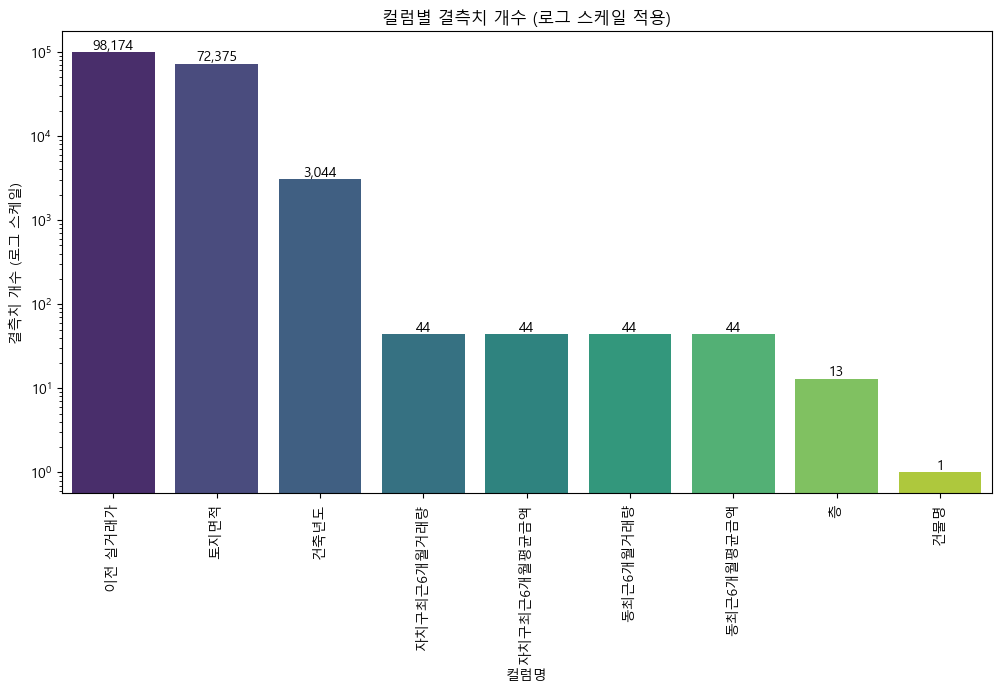

In [129]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 결측치 개수 계산 (0이 아닌 값만 남기고 내림차순 정렬)
missing = df.isna().sum()
missing = missing[missing > 0].sort_values(ascending=False)  # 0인 값 제거 + 내림차순 정렬
missing_df = missing.reset_index()
missing_df.columns = ["컬럼명", "결측치 개수"]

# 시각화
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="컬럼명", y="결측치 개수", data=missing_df, palette="viridis")

# y축 로그 스케일 적용
plt.yscale("log")

# 각 바 위에 숫자 표시
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}',  # 천 단위 콤마 추가
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black', rotation=0)

plt.xticks(rotation=90)  # x축 라벨 회전
plt.ylabel("결측치 개수 (로그 스케일)")
plt.title("컬럼별 결측치 개수 (로그 스케일 적용)")
plt.show()


### 건물명 결측치 채우기

In [131]:
df.loc[df["건물명"].isna(), '건물명'] = '건물명없음'

In [133]:
sum(df["건물명"].isna())

0

### 층 결측치 채우기
- 같은 자치구코드+ 법정동코드를 가진 동네의 층값들의 최빈값

In [136]:
import pandas as pd

# 최빈값을 구하는 함수 (여러 개일 경우 가장 작은 값 선택)
def get_mode(series):
    mode_values = series.mode()  # 최빈값 계산
    return mode_values.iloc[0] if not mode_values.empty else None  # 여러 개일 경우 첫 번째 값 반환

In [138]:
# 같은 '자치구코드' & '법정동코드' 그룹별로 최빈값 구하기
mode_floors = df.groupby(["자치구코드", "법정동코드"])["층"].apply(get_mode)

In [140]:
# 결측치 채우기 (merge 사용)
df = df.merge(mode_floors.rename("층_최빈값"), on=["자치구코드", "법정동코드"], how="left")

# 결측치 있는 행에 대해서만 최빈값으로 채우기
df["층"].fillna(df["층_최빈값"], inplace=True)

# 임시 컬럼 제거
df.drop(columns=["층_최빈값"], inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_7980\824148816.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["층"].fillna(df["층_최빈값"], inplace=True)


In [142]:
sum(df["층"].isna())

0

### 자치구최근6개월거래량, 자치구최근6개월평균금액 결측치 채우기
- 결측치가 있는 행을 찾고, 같은 자치구코드를 가진 가장 최근(계약일이 작은 값) 데이터로 채움.

In [144]:
# 결측치를 같은 '자치구코드' 내 최근 데이터로 채우기
for col in ["자치구최근6개월거래량", "자치구최근6개월평균금액"]:
    df[col] = df.sort_values(by=["자치구코드", "계약일"], ascending=True).groupby("자치구코드")[col].ffill()

In [146]:
sum(df["자치구최근6개월거래량"].isna())

0

In [148]:
sum(df["자치구최근6개월평균금액"].isna())

0

### 법정동최근6개월거래량, 자법정동최근6개월평균금액 결측치 채우기
- 결측치가 있는 행을 찾고, 같은 자치구코드+법정동코드를 가진 가장 최근(계약일이 작은 값) 데이터로 채움.

In [153]:
# 결측치를 같은 '자치구코드 + 법정동코드' 내 최근 데이터(계약일 기준)로 채우기
for col in ["동최근6개월거래량", "동최근6개월평균금액"]:
    df[col] = df.sort_values(by=["자치구코드", "법정동코드", "계약일"], ascending=True).groupby(["자치구코드", "법정동코드"])[col].ffill()

In [158]:
sum(df["동최근6개월거래량"].isna())

0

In [160]:
sum(df["동최근6개월평균금액"].isna())

0

### 건축년도 결측치 채우기

In [166]:
# 같은 '자치구코드' + '법정동코드' + '건물용도' 내 중앙값으로 채우기
df["건축년도"] = df.groupby(["자치구코드", "법정동코드", "건물용도"])["건축년도"].transform(lambda x: x.fillna(x.median()))

In [168]:
sum(df["건축년도"].isna())

1

In [170]:
# 그래도 결측치가 있어서 같은 '자치구코드' + '법정동코드' 내 중앙값으로 보완
df["건축년도"] = df.groupby(["자치구코드", "법정동코드"])["건축년도"].transform(lambda x: x.fillna(x.median()))

In [172]:
sum(df["건축년도"].isna())

0

### 토지면적 결측치 채우기
- 회귀 모델을 이용하여 토지면적 예측 & 결측치 채우기
- -> 하려고 분포 확인해봤는데 0인 값 너무 많음. 

In [182]:
print(df[["건물면적", "토지면적"]].describe())

                건물면적           토지면적
count  515084.000000  442709.000000
mean       57.289020      20.413314
std        30.296252      62.265508
min         6.280000       0.000000
25%        34.380000       0.000000
50%        53.880000      19.840000
75%        77.360000      31.170000
max       767.600000   30822.000000


In [190]:
df['토지면적'].value_counts()

토지면적
0.000      164955
18.000       1440
19.000       1301
28.000       1258
20.000       1256
            ...  
67.090          1
422.080         1
90.990          1
99.190          1
53.758          1
Name: count, Length: 10348, dtype: int64

- 토지면적 0인 값 NaN으로 변경

In [196]:
# 토지면적이 0인 값(NaN으로 변경)
df.loc[df["토지면적"] == 0, "토지면적"] = np.nan

# 변경 후 결측치 개수 확인
missing_land_area = df["토지면적"].isna().sum()
print(f"토지면적 결측치 개수 (0을 NaN으로 변경 후): {missing_land_area}")

토지면적 결측치 개수 (0을 NaN으로 변경 후): 237330


In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515084 entries, 0 to 515083
Data columns (total 40 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   접수연도          515084 non-null  int64  
 1   자치구코드         515084 non-null  int64  
 2   자치구명          515084 non-null  object 
 3   법정동코드         515084 non-null  int64  
 4   법정동명          515084 non-null  object 
 5   본번            515084 non-null  int64  
 6   부번            515084 non-null  int64  
 7   주소            515084 non-null  object 
 8   위도            515084 non-null  float64
 9   경도            515084 non-null  float64
 10  geometry      515084 non-null  object 
 11  건물명           515084 non-null  object 
 12  계약일           515084 non-null  object 
 13  물건금액          515084 non-null  int64  
 14  건물면적          515084 non-null  float64
 15  토지면적          277754 non-null  float64
 16  층             515084 non-null  float64
 17  건축년도          515084 non-null  float64
 18  건물용도

In [593]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# 1️⃣ 사용할 변수(Feature) 선택
features = [
    "건물면적", "층", "건축년도", "건물용도"
]

# 2️⃣ 결측치 제거 & 범주형 데이터 변환
df_model = df[features + ["토지면적"]].copy()
df_model.dropna(subset=["토지면적"], inplace=True)  # 토지면적 결측치 제거

# 숫자형 변수에만 중앙값(median) 적용
num_cols = df_model.select_dtypes(include=["number"]).columns  # 숫자형 변수만 선택
df_model[num_cols] = df_model[num_cols].fillna(df_model[num_cols].median())

# 범주형 변수는 최빈값(mode)으로 채우기
cat_cols = ["건물용도"]
for col in cat_cols:
    df_model[col] = df_model[col].fillna(df_model[col].mode()[0])  # 최빈값으로 채우기

# LabelEncoder 대신 pd.factorize() 사용하여 범주형 변수를 숫자로 변환
for col in cat_cols:
    df_model[col], _ = pd.factorize(df_model[col])

# 학습 데이터 분할
X = df_model.drop(columns=["토지면적"])
y = df_model["토지면적"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 학습
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 예측 및 성능 평가
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE (Mean Absolute Error): {mae:.2f}")

# 예측값을 결측치에 채우기
df_missing = df[df["토지면적"].isna()]
X_missing = df_missing[features].copy()

# Label Encoding 없이 factorize 방식으로 인코딩 처리
for col in cat_cols:
    X_missing[col] = pd.factorize(X_missing[col])[0]


MAE (Mean Absolute Error): 1.59


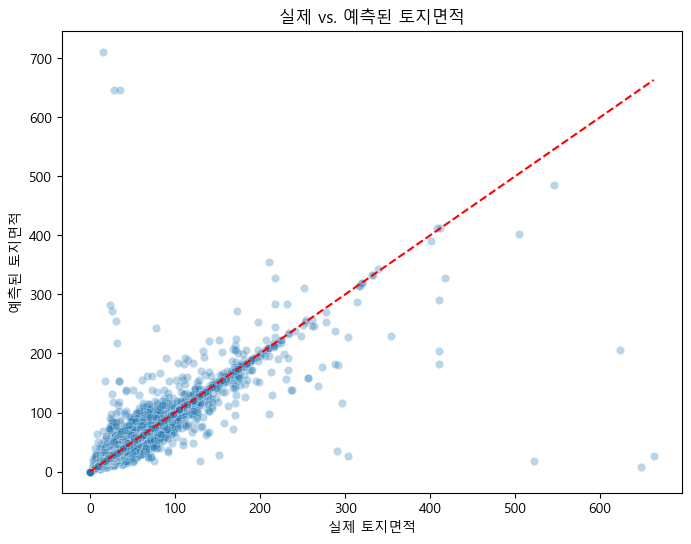

C:\Users\user\AppData\Local\Temp\ipykernel_7980\665498062.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importances, palette="viridis")


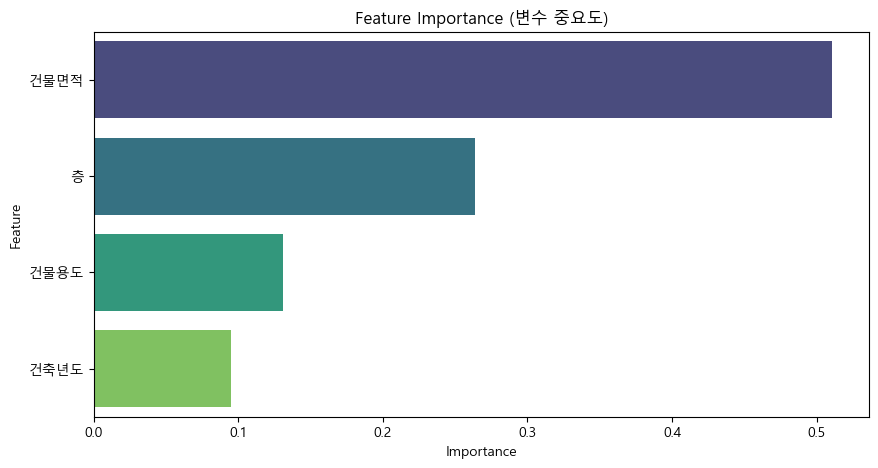

MAPE (Mean Absolute Percentage Error): 8.81%
R² Score: 0.8971


In [594]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

# 실제 vs. 예측값 비교 (산점도)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.3)
plt.xlabel("실제 토지면적")
plt.ylabel("예측된 토지면적")
plt.title("실제 vs. 예측된 토지면적")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle="--", color="red")  # 대각선 기준선 추가
plt.show()

# Feature Importance (변수 중요도 확인)
feature_importances = pd.DataFrame({"Feature": X_train.columns, "Importance": model.feature_importances_})
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x="Importance", y="Feature", data=feature_importances, palette="viridis")
plt.title("Feature Importance (변수 중요도)")
plt.show()

# 3️모델 평가 지표 추가 계산
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # Mean Absolute Percentage Error
r2 = r2_score(y_test, y_pred)  # R² Score

print(f"MAPE (Mean Absolute Percentage Error): {mape:.2f}%")
print(f"R² Score: {r2:.4f}")


In [230]:
# 예측값을 결측치에 채우기
df_missing = df[df["토지면적"].isna()]
X_missing = df_missing[features].copy()

# 범주형 변수 인코딩 적용 (factorize 방식 사용)
for col in cat_cols:
    X_missing[col] = pd.factorize(X_missing[col])[0]

# 예측값으로 결측치 채우기
df.loc[df["토지면적"].isna(), "토지면적"] = model.predict(X_missing)

# 결측치 개수 확인
print(f"토지면적 결측치 개수 (채운 후): {df['토지면적'].isna().sum()}")

토지면적 결측치 개수 (채운 후): 0


### 이전 실거래가 결측치 채우기

In [241]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# 사용할 변수(Feature) 선택
features = [
    "건물면적", "토지면적", "층", "건축년도", "건물용도", 
    "자치구코드", "법정동코드", "자치구최근6개월평균금액", "동최근6개월평균금액"
]

# 결측치 제거 & 범주형 데이터 변환
df_model = df[features + ["이전 실거래가"]].copy()
df_model.dropna(subset=["이전 실거래가"], inplace=True)  # 이전 실거래가 결측치 제거

# 숫자형 변수에만 중앙값(median) 적용
num_cols = df_model.select_dtypes(include=["number"]).columns  # 숫자형 변수만 선택
df_model[num_cols] = df_model[num_cols].fillna(df_model[num_cols].median())

# 범주형 변수는 최빈값(mode)으로 채우기
cat_cols = ["건물용도"]
for col in cat_cols:
    df_model[col] = df_model[col].fillna(df_model[col].mode()[0])  # 최빈값으로 채우기

# LabelEncoder 대신 pd.factorize() 사용하여 범주형 변수를 숫자로 변환
for col in cat_cols:
    df_model[col], _ = pd.factorize(df_model[col])

# 학습 데이터 분할
X = df_model.drop(columns=["이전 실거래가"])
y = df_model["이전 실거래가"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 학습
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 예측 및 성능 평가
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE (Mean Absolute Error): {mae:.2f}")

# 예측값을 결측치에 채우기
df_missing = df[df["이전 실거래가"].isna()]
X_missing = df_missing[features].copy()

# Label Encoding 없이 factorize 방식으로 인코딩 처리
for col in cat_cols:
    X_missing[col] = pd.factorize(X_missing[col])[0]


MAE (Mean Absolute Error): 7436.80


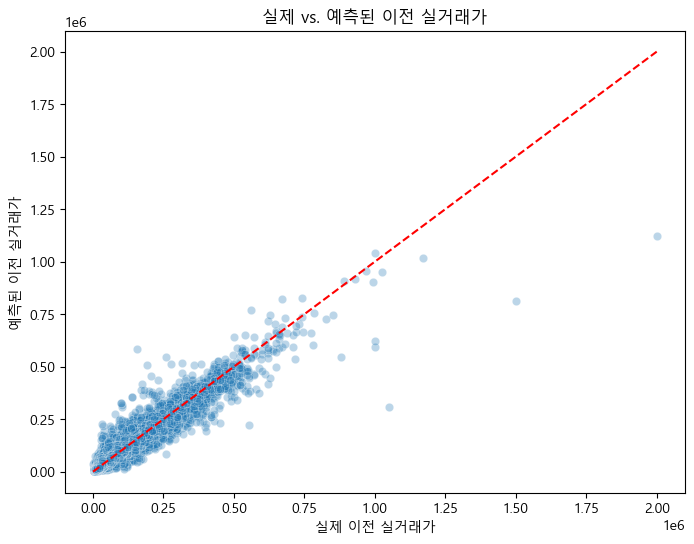

C:\Users\user\AppData\Local\Temp\ipykernel_7980\502195544.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importances, palette="viridis")


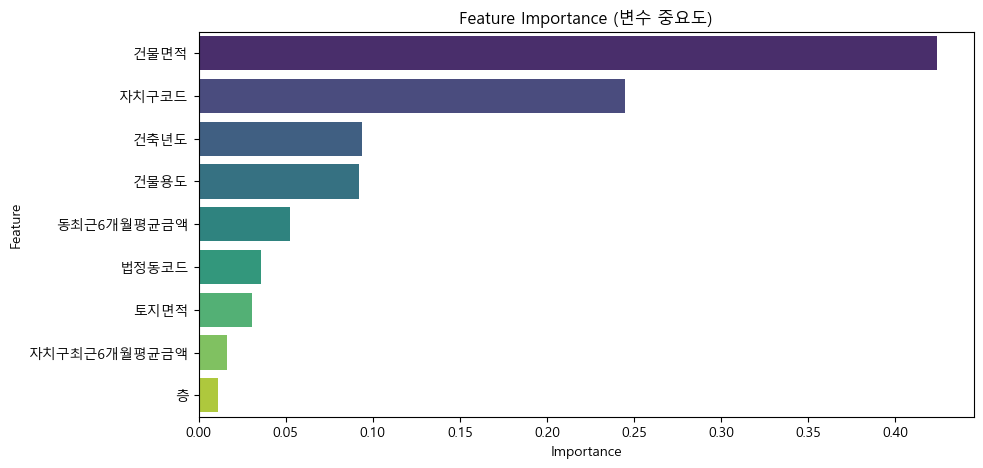

MAPE (Mean Absolute Percentage Error): 14.22%
R² Score: 0.9466


In [243]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

# 1️실제 vs. 예측값 비교 (산점도)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.3)
plt.xlabel("실제 이전 실거래가")
plt.ylabel("예측된 이전 실거래가")
plt.title("실제 vs. 예측된 이전 실거래가")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle="--", color="red")  # 기준선 추가
plt.show()

# 2️Feature Importance (변수 중요도 확인)
feature_importances = pd.DataFrame({"Feature": X_train.columns, "Importance": model.feature_importances_})
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x="Importance", y="Feature", data=feature_importances, palette="viridis")
plt.title("Feature Importance (변수 중요도)")
plt.show()

# 모델 평가 지표 추가 계산
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # Mean Absolute Percentage Error
r2 = r2_score(y_test, y_pred)  # R² Score

print(f"MAPE (Mean Absolute Percentage Error): {mape:.2f}%")
print(f"R² Score: {r2:.4f}")


In [245]:
# 예측값 채우기
df.loc[df["이전 실거래가"].isna(), "이전 실거래가"] = model.predict(X_missing)

# 결측치 개수 확인
print(f"이전 실거래가 결측치 개수 (채운 후): {df['이전 실거래가'].isna().sum()}")

이전 실거래가 결측치 개수 (채운 후): 0


In [251]:
df.isna().sum().sum()

0

In [255]:
df.to_csv("C:/ZIPcoding/df_after_fill_NaN.csv", index = False)

## 컬럼 타입 정리

In [343]:
df = pd.read_csv("C:/ZIPcoding/df_after_fill_NaN.csv", low_memory = False)

In [345]:
df.head()

,접수연도,자치구코드,자치구명,법정동코드,법정동명,본번,부번,주소,위도,경도,...,서울5대학군지여부,수도권아파트입주물량,한강변여부,최근접역,최근접역_노선,최근접역_연결역개수,최근접역_환승역구분,최근접역_직선거리,최근접역_도로거리,면적구분
0,2020,11290,성북구,13600,하월곡동,222,0,서울특별시 성북구 하월곡동 222,37.607033,127.038366,...,0.0,"12,532",0,월곡(동덕여대),['6호선'],1,일반역,0.664071,-1.0,중형
1,2020,11380,은평구,10400,갈현동,432,7,서울특별시 은평구 갈현동 432-7,37.620439,126.916566,...,0.0,"12,532",0,연신내,"['3호선', '6호선']",2,환승역,0.514208,-1.0,소형
2,2020,11620,관악구,10100,봉천동,635,368,서울특별시 관악구 봉천동 635-368,37.487369,126.941912,...,0.0,"12,532",0,봉천,['2호선'],1,일반역,0.555815,-1.0,소형
3,2020,11350,노원구,10300,공릉동,747,0,서울특별시 노원구 공릉동 747,37.620935,127.079878,...,0.0,"12,532",0,화랑대(서울여대입구),['6호선'],1,일반역,0.542655,-1.0,중형
4,2020,11470,양천구,10200,목동,941,0,서울특별시 양천구 목동 941,37.532181,126.866836,...,1.0,"12,532",0,목동,['5호선'],1,일반역,0.711087,-1.0,중형


In [347]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515084 entries, 0 to 515083
Data columns (total 38 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   접수연도          515084 non-null  int64  
 1   자치구코드         515084 non-null  int64  
 2   자치구명          515084 non-null  object 
 3   법정동코드         515084 non-null  int64  
 4   법정동명          515084 non-null  object 
 5   본번            515084 non-null  int64  
 6   부번            515084 non-null  int64  
 7   주소            515084 non-null  object 
 8   위도            515084 non-null  float64
 9   경도            515084 non-null  float64
 10  geometry      515084 non-null  object 
 11  건물명           515084 non-null  object 
 12  계약일           515084 non-null  object 
 13  물건금액          515084 non-null  int64  
 14  건물면적          515084 non-null  float64
 15  토지면적          515084 non-null  float64
 16  층             515084 non-null  float64
 17  건축년도          515084 non-null  float64
 18  건물용도

In [349]:
# 계약일 컬럼을 datetime 형식으로 변환
df["계약일"] = pd.to_datetime(df["계약일"], errors="coerce")

# 변환 후 데이터 타입 확인
print(df["계약일"].dtype)

datetime64[ns]


In [351]:
df['서울5대학군지여부'] = df['서울5대학군지여부'].astype(int)

# 변환 후 데이터 타입 확인
print(df["서울5대학군지여부"].dtype)

int32


In [353]:
import ast

In [355]:
# 문자열로 저장된 리스트를 실제 리스트로 변환
df["최근접역_노선"] = df["최근접역_노선"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# 변환 후 데이터 타입 확인
print(type(df["최근접역_노선"].iloc[0]))  # 리스트인지 확인

# 변환된 데이터 일부 확인
df["최근접역_노선"].head()

<class 'list'>


0         [6호선]
1    [3호선, 6호선]
2         [2호선]
3         [6호선]
4         [5호선]
Name: 최근접역_노선, dtype: object

In [356]:
# '12,532' -> 12532(int)
df["수도권아파트입주물량"] = df["수도권아파트입주물량"].str.replace(",", "").astype(int)

# 변환 후 데이터 타입 확인
print(df["수도권아파트입주물량"].dtype)

# 변환된 데이터 일부 확인
df["수도권아파트입주물량"].head()

int32


0    12532
1    12532
2    12532
3    12532
4    12532
Name: 수도권아파트입주물량, dtype: int32

In [357]:
df['층'] = df['층'].astype(int)

# 변환 후 데이터 타입 확인
print(df["층"].dtype)

int32


In [358]:
df['건축년도'] = df['건축년도'].astype(int)

# 변환 후 데이터 타입 확인
print(df["건축년도"].dtype)

int32


In [359]:
df['자치구최근6개월거래량'] = df['자치구최근6개월거래량'].astype(int)

# 변환 후 데이터 타입 확인
print(df["자치구최근6개월거래량"].dtype)

int32


In [360]:
df['동최근6개월거래량'] = df['동최근6개월거래량'].astype(int)

# 변환 후 데이터 타입 확인
print(df["동최근6개월거래량"].dtype)

int32


In [443]:
df["자치구코드"] = df["자치구코드"].astype("object")
df["법정동코드"] = df["법정동코드"].astype("object")

# 변환 후 데이터 타입 확인
print(df.dtypes[["자치구코드", "법정동코드"]])

자치구코드    object
법정동코드    object
dtype: object


In [469]:
df["서울5대학군지여부"] = df["서울5대학군지여부"].astype("object")

In [475]:
df["한강변여부"] = df["한강변여부"].astype("object")

In [477]:
df.iloc[:,20:].head()

,이전 실거래가,자치구최근6개월거래량,자치구최근6개월평균금액,동최근6개월거래량,동최근6개월평균금액,한국은행 기준금리,계약연월,고정형 주택담보대출,서울5대학군지여부,수도권아파트입주물량,한강변여부,최근접역,최근접역_노선,최근접역_연결역개수,최근접역_환승역구분,최근접역_직선거리,최근접역_도로거리,면적구분
0,65300.00,4192,44427.6880,893,40519.3953,1.25,202001,2.42,0,12532,0,월곡(동덕여대),[6호선],1,일반역,0.664071,-1.0,중형
1,44060.95,4198,44464.0510,1307,40554.1232,1.25,202001,2.42,0,12532,0,연신내,"[3호선, 6호선]",2,환승역,0.514208,-1.0,소형
2,33300.00,3424,47165.7564,1373,41254.2535,1.25,202001,2.42,0,12532,0,봉천,[2호선],1,일반역,0.555815,-1.0,소형
3,58500.00,2689,35200.7107,743,26283.1252,1.25,202001,2.42,0,12532,0,화랑대(서울여대입구),[6호선],1,일반역,0.542655,-1.0,중형
4,103000.00,3260,35860.0610,1324,41265.8399,1.25,202001,2.42,1,12532,0,목동,[5호선],1,일반역,0.711087,-1.0,중형


In [479]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515084 entries, 0 to 515083
Data columns (total 38 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   접수연도          515084 non-null  int64         
 1   자치구코드         515084 non-null  object        
 2   자치구명          515084 non-null  object        
 3   법정동코드         515084 non-null  object        
 4   법정동명          515084 non-null  object        
 5   본번            515084 non-null  int64         
 6   부번            515084 non-null  int64         
 7   주소            515084 non-null  object        
 8   위도            515084 non-null  float64       
 9   경도            515084 non-null  float64       
 10  geometry      515084 non-null  object        
 11  건물명           515084 non-null  object        
 12  계약일           515084 non-null  datetime64[ns]
 13  물건금액          515084 non-null  int64         
 14  건물면적          515084 non-null  float64       
 15  토지면적          515

In [483]:
del df['최근접역_도로거리']

In [485]:
df.to_pickle("C:/ZIPcoding/df_after_fill_NaN.pkl")

In [597]:
# 저장된 피클 파일 불러오기
df = pd.read_pickle("C:/ZIPcoding/df_after_fill_NaN.pkl")

## EDA

### 수치형 변수 EDA

In [467]:
df['접수연도'].value_counts()

접수연도
2020    156949
2021    128374
2024     93232
2023     67024
2022     61422
2025      8080
2019         3
Name: count, dtype: int64

In [487]:
# 수치형 변수만 선택
# num_cols = df.select_dtypes(include=["int32", "int64", "float64"]).columns
num_cols = ['위도', '경도', '물건금액', '건물면적', '토지면적', '층', '건축년도', '건물면적정수', '이전 실거래가', '자치구최근6개월거래량', '자치구최근6개월평균금액', '동최근6개월거래량', '동최근6개월평균금액', '한국은행 기준금리', '고정형 주택담보대출', '수도권아파트입주물량', '최근접역_연결역개수', '최근접역_직선거리']

In [489]:
# 수치형 변수 기초 통계량 확인
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
위도,515084.0,37.551435,0.054476,37.434063,37.504496,37.546584,37.592276,3.768763e+01
경도,515084.0,126.983943,0.092929,126.798879,126.907700,126.997259,127.060116,1.271808e+02
물건금액,515084.0,63176.081519,66079.389061,2000.000000,23800.000000,39750.000000,81000.000000,2.450000e+06
건물면적,515084.0,57.289020,30.296252,6.280000,34.380000,53.880000,77.360000,7.676000e+02
토지면적,515084.0,37.457695,59.738049,3.000000,23.860000,31.510000,42.820000,3.082200e+04
층,515084.0,6.728984,5.837384,-3.000000,3.000000,5.000000,10.000000,6.800000e+01
건축년도,515084.0,1993.336809,154.696345,0.000000,1997.000000,2005.000000,2015.000000,2.024000e+03
건물면적정수,515084.0,56.701874,30.249777,6.000000,34.000000,53.000000,77.000000,7.670000e+02
이전 실거래가,515084.0,61367.166804,62274.941459,630.000000,24000.000000,40000.000000,78490.500000,2.000000e+06
자치구최근6개월거래량,515084.0,3015.713352,1548.457122,334.000000,1779.000000,2787.000000,3891.000000,7.407000e+03


In [499]:
df['층'][df['층'] > 30]

133       33
1039      34
1056      46
1479      31
1835      35
          ..
513645    34
513938    32
514402    39
514786    34
515030    31
Name: 층, Length: 2184, dtype: int32

저장 완료: C:/ZIPcoding/plots/위도_boxplot.png


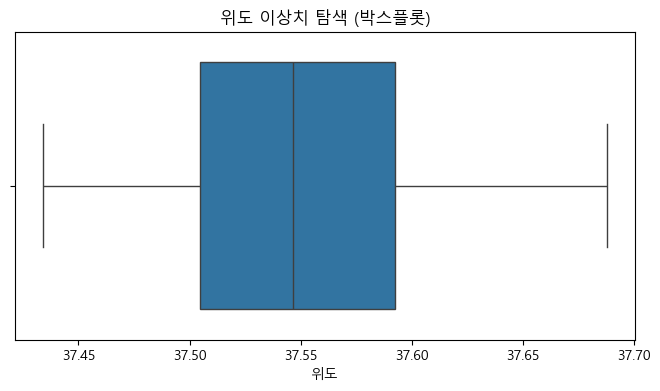

저장 완료: C:/ZIPcoding/plots/경도_boxplot.png


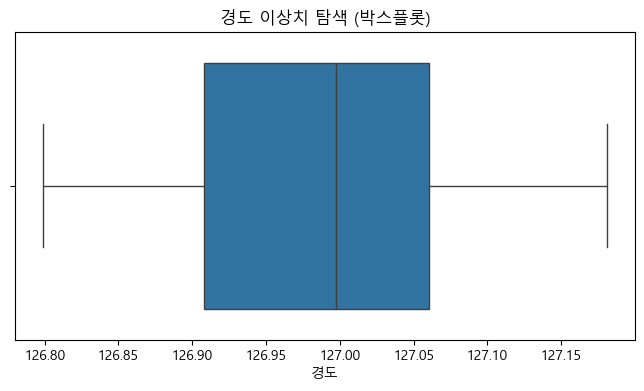

저장 완료: C:/ZIPcoding/plots/물건금액_boxplot.png


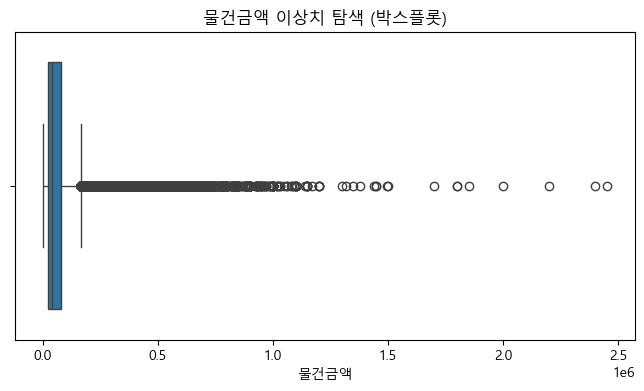

저장 완료: C:/ZIPcoding/plots/건물면적_boxplot.png


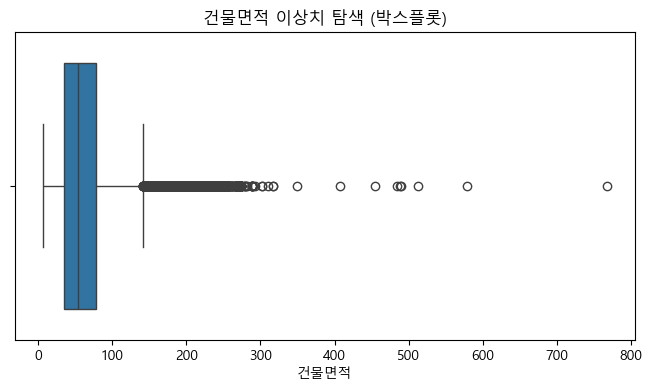

저장 완료: C:/ZIPcoding/plots/토지면적_boxplot.png


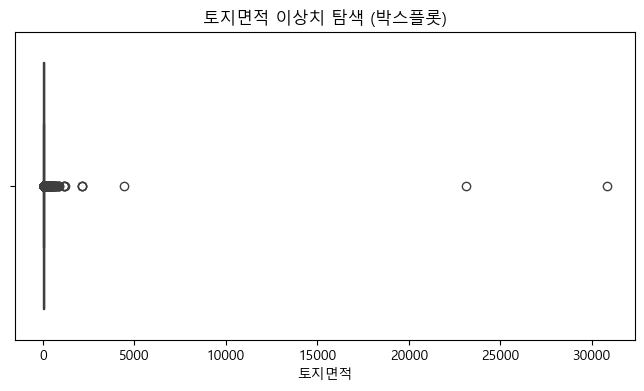

저장 완료: C:/ZIPcoding/plots/층_boxplot.png


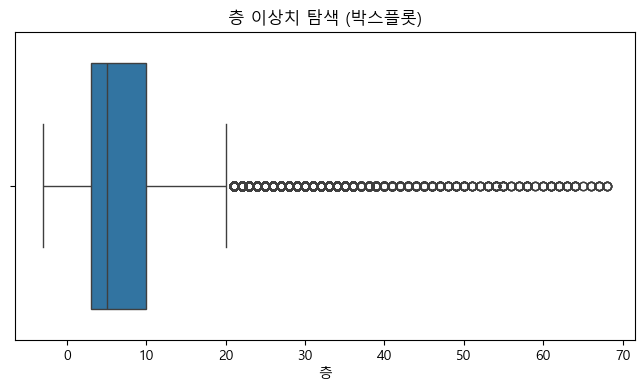

저장 완료: C:/ZIPcoding/plots/건축년도_boxplot.png


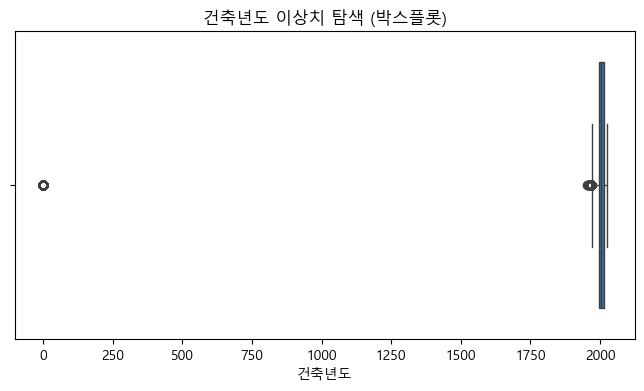

저장 완료: C:/ZIPcoding/plots/건물면적정수_boxplot.png


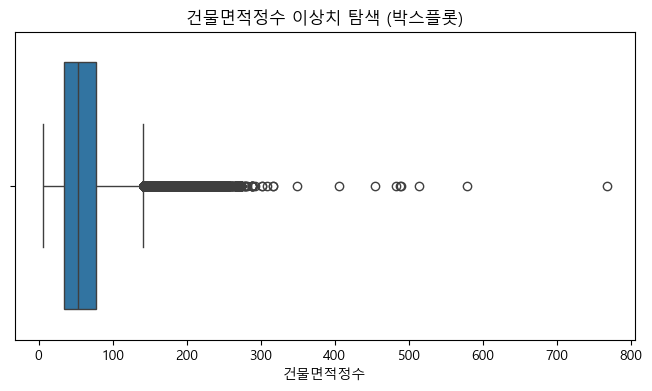

저장 완료: C:/ZIPcoding/plots/이전 실거래가_boxplot.png


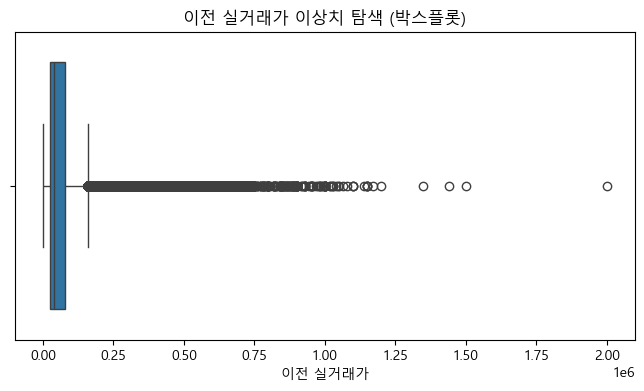

저장 완료: C:/ZIPcoding/plots/자치구최근6개월거래량_boxplot.png


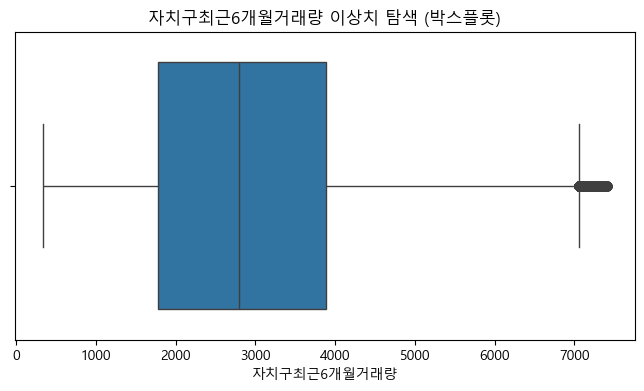

저장 완료: C:/ZIPcoding/plots/자치구최근6개월평균금액_boxplot.png


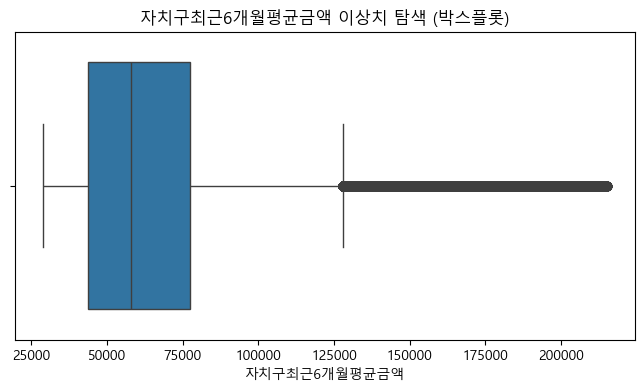

저장 완료: C:/ZIPcoding/plots/동최근6개월거래량_boxplot.png


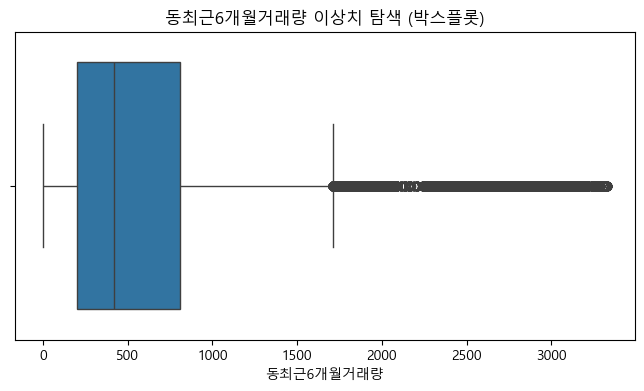

저장 완료: C:/ZIPcoding/plots/동최근6개월평균금액_boxplot.png


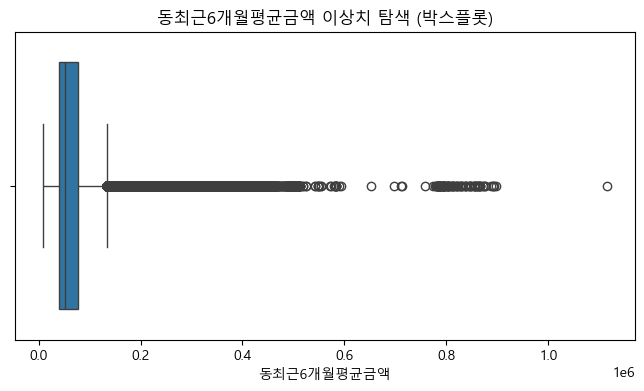

저장 완료: C:/ZIPcoding/plots/한국은행 기준금리_boxplot.png


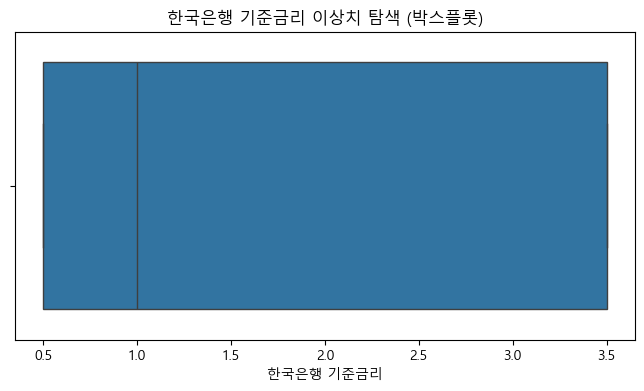

저장 완료: C:/ZIPcoding/plots/고정형 주택담보대출_boxplot.png


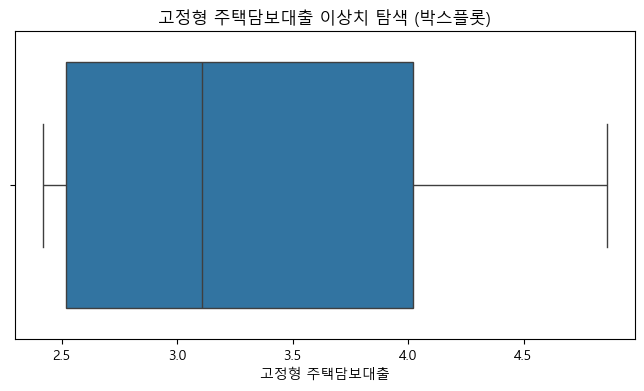

저장 완료: C:/ZIPcoding/plots/수도권아파트입주물량_boxplot.png


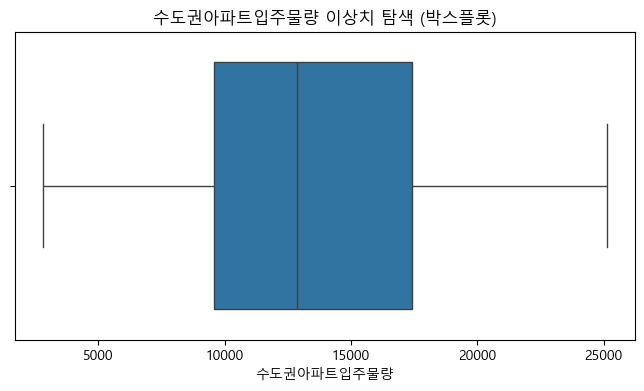

저장 완료: C:/ZIPcoding/plots/최근접역_연결역개수_boxplot.png


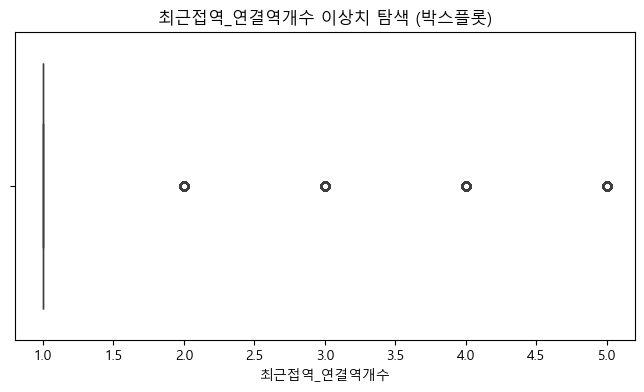

저장 완료: C:/ZIPcoding/plots/최근접역_직선거리_boxplot.png


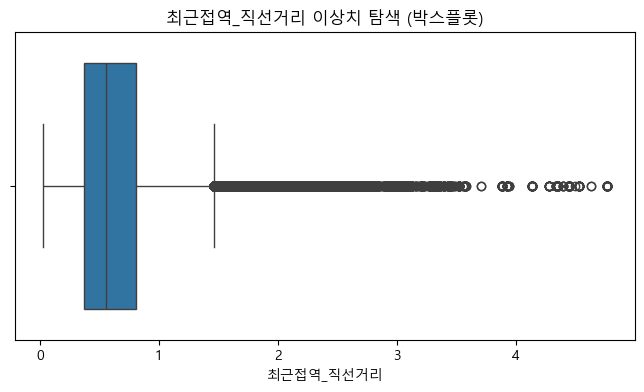

In [505]:
# 박스플롯으로 이상치 탐색
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.xlabel(col)
    plt.title(f"{col} 이상치 탐색 (박스플롯)")
    
    # 박스플롯 저장
    save_path = "C:/ZIPcoding/plots/"
    boxplot_filename = f"{save_path}{col}_boxplot.png"
    plt.savefig(boxplot_filename, dpi=300)
    print(f"저장 완료: {boxplot_filename}")
    
    plt.show()
    plt.close()  # 메모리 절약을 위해 닫기

In [509]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # 1사분위수 (25%)
    Q3 = df[column].quantile(0.75)  # 3사분위수 (75%)
    IQR = Q3 - Q1  # IQR 계산

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 이상치 데이터 출력
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [513]:
for col in num_cols:
    outliers = detect_outliers_iqr(df, col)
    print(f'{col} 컬럼의 IQR 기준 이상치 개수 :', len(outliers))

위도 컬럼의 IQR 기준 이상치 개수 : 0
경도 컬럼의 IQR 기준 이상치 개수 : 0
물건금액 컬럼의 IQR 기준 이상치 개수 : 31938
건물면적 컬럼의 IQR 기준 이상치 개수 : 8611
토지면적 컬럼의 IQR 기준 이상치 개수 : 37865
층 컬럼의 IQR 기준 이상치 개수 : 15196
건축년도 컬럼의 IQR 기준 이상치 개수 : 3343
건물면적정수 컬럼의 IQR 기준 이상치 개수 : 8599
이전 실거래가 컬럼의 IQR 기준 이상치 개수 : 31264
자치구최근6개월거래량 컬럼의 IQR 기준 이상치 개수 : 5708
자치구최근6개월평균금액 컬럼의 IQR 기준 이상치 개수 : 42032
동최근6개월거래량 컬럼의 IQR 기준 이상치 개수 : 26522
동최근6개월평균금액 컬럼의 IQR 기준 이상치 개수 : 36699
한국은행 기준금리 컬럼의 IQR 기준 이상치 개수 : 0
고정형 주택담보대출 컬럼의 IQR 기준 이상치 개수 : 0
수도권아파트입주물량 컬럼의 IQR 기준 이상치 개수 : 0
최근접역_연결역개수 컬럼의 IQR 기준 이상치 개수 : 107690
최근접역_직선거리 컬럼의 IQR 기준 이상치 개수 : 24823


### 건축년도 이상치 처리

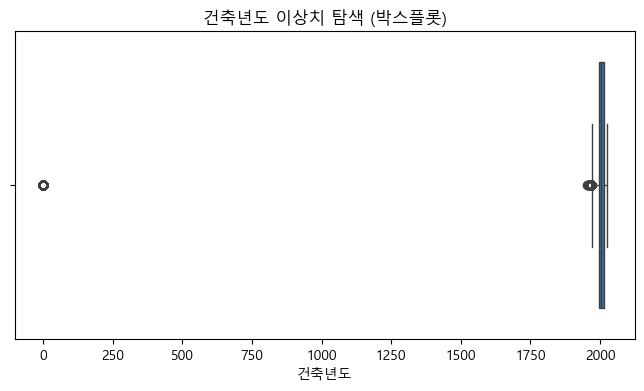

In [521]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['건축년도'])
plt.xlabel('건축년도')
plt.title("건축년도 이상치 탐색 (박스플롯)")
plt.show()

In [563]:
len(df[df['건축년도'] == 0])

3067

In [599]:
# 자치구코드 + 법정동코드 중앙값(Median)으로 대체
df.loc[df["건축년도"] == 0, "건축년도"] = df.groupby(["자치구코드", "법정동코드"])["건축년도"].transform(lambda x: x.median())

# 그래도0 이면 자치구코드 중앙값(Median)으로 대체
df.loc[df["건축년도"] == 0, "건축년도"] = df.groupby(["자치구코드"])["건축년도"].transform(lambda x: x.median())

C:\Users\user\AppData\Local\Temp\ipykernel_7980\2985019748.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[2009. 1989. 2015. ... 2012. 2021. 2007.]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[df["건축년도"] == 0, "건축년도"] = df.groupby(["자치구코드", "법정동코드"])["건축년도"].transform(lambda x: x.median())


In [601]:
len(df[df['건축년도'] == 0])

0

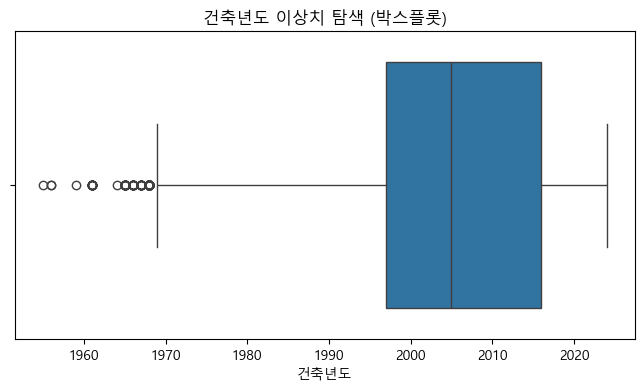

In [569]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['건축년도'])
plt.xlabel('건축년도')
plt.title("건축년도 이상치 탐색 (박스플롯)")
plt.show()

In [575]:
for col in num_cols:
    outliers = detect_outliers_iqr(df, col)
    print(f'{col} 컬럼의 IQR 기준 이상치 개수 :', len(outliers), '/', len(df))

위도 컬럼의 IQR 기준 이상치 개수 : 0 / 515084
경도 컬럼의 IQR 기준 이상치 개수 : 0 / 515084
물건금액 컬럼의 IQR 기준 이상치 개수 : 31938 / 515084
건물면적 컬럼의 IQR 기준 이상치 개수 : 8611 / 515084
토지면적 컬럼의 IQR 기준 이상치 개수 : 37865 / 515084
층 컬럼의 IQR 기준 이상치 개수 : 15196 / 515084
건축년도 컬럼의 IQR 기준 이상치 개수 : 183 / 515084
건물면적정수 컬럼의 IQR 기준 이상치 개수 : 8599 / 515084
이전 실거래가 컬럼의 IQR 기준 이상치 개수 : 31264 / 515084
자치구최근6개월거래량 컬럼의 IQR 기준 이상치 개수 : 5708 / 515084
자치구최근6개월평균금액 컬럼의 IQR 기준 이상치 개수 : 42032 / 515084
동최근6개월거래량 컬럼의 IQR 기준 이상치 개수 : 26522 / 515084
동최근6개월평균금액 컬럼의 IQR 기준 이상치 개수 : 36699 / 515084
한국은행 기준금리 컬럼의 IQR 기준 이상치 개수 : 0 / 515084
고정형 주택담보대출 컬럼의 IQR 기준 이상치 개수 : 0 / 515084
수도권아파트입주물량 컬럼의 IQR 기준 이상치 개수 : 0 / 515084
최근접역_연결역개수 컬럼의 IQR 기준 이상치 개수 : 107690 / 515084
최근접역_직선거리 컬럼의 IQR 기준 이상치 개수 : 24823 / 515084


### 토지면적 이상치 확인

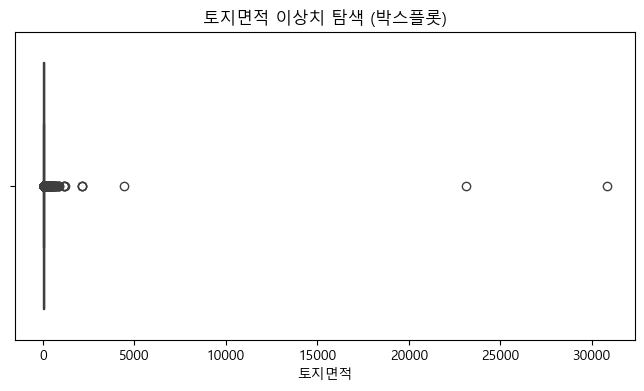

In [585]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['토지면적'])
plt.xlabel('토지면적')
plt.title("토지면적 이상치 탐색 (박스플롯)")
plt.show()

In [644]:
df[df['토지면적'] >= 20000]

,접수연도,자치구코드,자치구명,법정동코드,법정동명,본번,부번,주소,위도,경도,geometry,건물명,계약일,물건금액,건물면적,토지면적,층,건축년도,건물용도,건물면적정수,이전 실거래가,자치구최근6개월거래량,자치구최근6개월평균금액,동최근6개월거래량,동최근6개월평균금액,한국은행 기준금리,계약연월,고정형 주택담보대출,서울5대학군지여부,수도권아파트입주물량,한강변여부,최근접역,최근접역_노선,최근접역_연결역개수,최근접역_환승역구분,최근접역_직선거리,면적구분
242311,2021,11230,동대문구,10600,장안동,394,2,서울특별시 동대문구 장안동 394-2,37.568500,127.06655,POINT (127.06655 37.5684996),더하이엔드,2021-07-21,43000,38.92,23145.0,6,2021.0,연립다세대,38,35036.52,2210,56664.6801,150,104444.7533,0.5,202107,2.92,0,16623,0,장한평,[5호선],1,일반역,0.812284,소형
426499,2024,11560,영등포구,13300,대림동,1093,8,서울특별시 영등포구 대림동 1093-8,37.487985,126.90130,POINT (126.9013003 37.4879851),미래파크타운,2024-03-04,52050,52.32,30822.0,3,2024.0,연립다세대,52,61533.00,1358,78210.8881,156,55181.1667,3.5,202403,3.90,0,18261,0,구로디지털단지,[2호선],1,일반역,0.302027,소형


In [648]:
df.loc[242311, '토지면적'] = 1301.8
df.loc[426499, '토지면적'] = 464.84

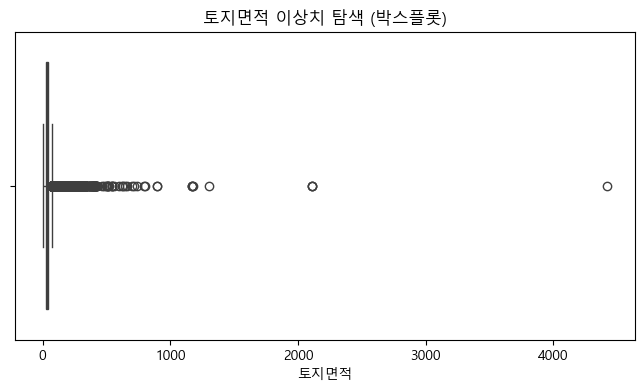

In [650]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['토지면적'])
plt.xlabel('토지면적')
plt.title("토지면적 이상치 탐색 (박스플롯)")
plt.show()

### 건축면적 이상치

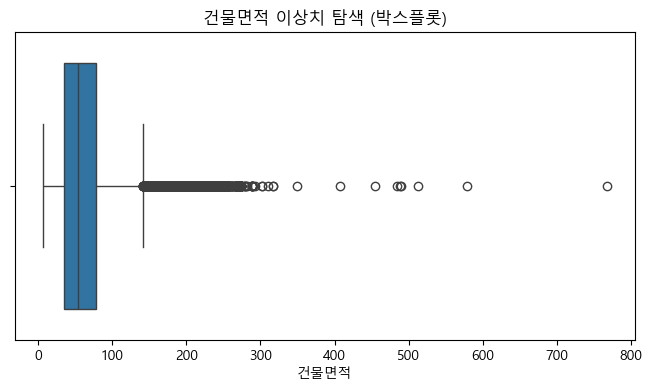

In [659]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['건물면적'])
plt.xlabel('건물면적')
plt.title("건물면적 이상치 탐색 (박스플롯)")
plt.show()

In [669]:
df[df['건물면적']>700]

,접수연도,자치구코드,자치구명,법정동코드,법정동명,본번,부번,주소,위도,경도,geometry,건물명,계약일,물건금액,건물면적,토지면적,층,건축년도,건물용도,건물면적정수,이전 실거래가,자치구최근6개월거래량,자치구최근6개월평균금액,동최근6개월거래량,동최근6개월평균금액,한국은행 기준금리,계약연월,고정형 주택담보대출,서울5대학군지여부,수도권아파트입주물량,한강변여부,최근접역,최근접역_노선,최근접역_연결역개수,최근접역_환승역구분,최근접역_직선거리,면적구분
118002,2020,11620,관악구,10300,남현동,1068,4,서울특별시 관악구 남현동 1068-4,37.475297,126.975254,POINT (126.9752543 37.4752973),늘사랑교회,2020-09-11,252000,767.6,278.3,2,1996.0,단독다가구,767,167786.0,2465,105801.0097,132,115348.4167,0.5,202009,2.46,0,9089,0,사당,"[2호선, 4호선]",2,환승역,0.71161,대형


In [671]:
df = df[df["건물면적"] <= 700]

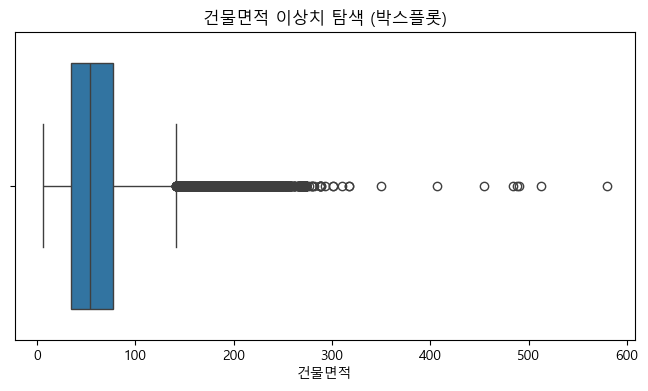

In [673]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['건물면적'])
plt.xlabel('건물면적')
plt.title("건물면적 이상치 탐색 (박스플롯)")
plt.show()

In [687]:
df.to_pickle("C:/ZIPcoding/dataset0221.pkl")

저장 완료: C:/ZIPcoding/plots/위도_histogram.png


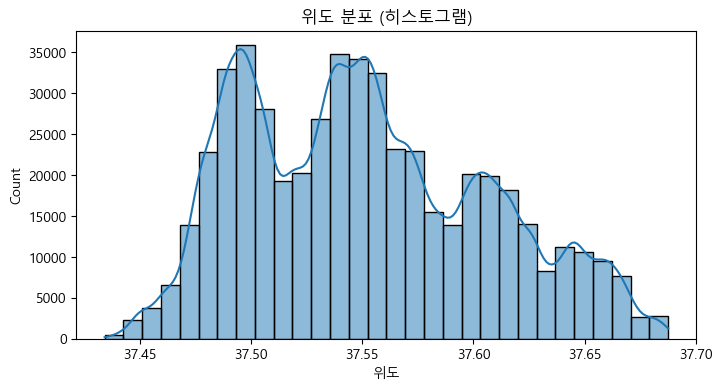

저장 완료: C:/ZIPcoding/plots/경도_histogram.png


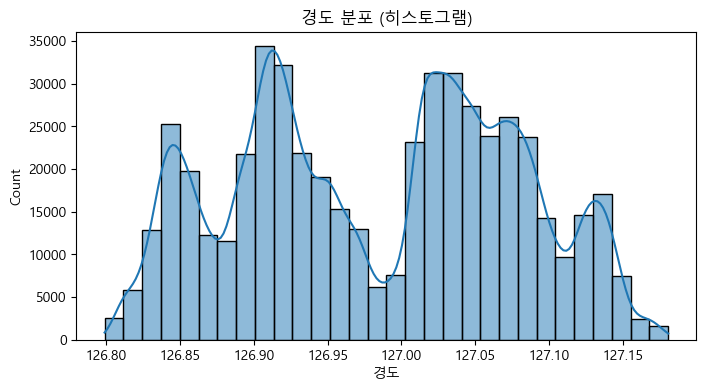

저장 완료: C:/ZIPcoding/plots/물건금액_histogram.png


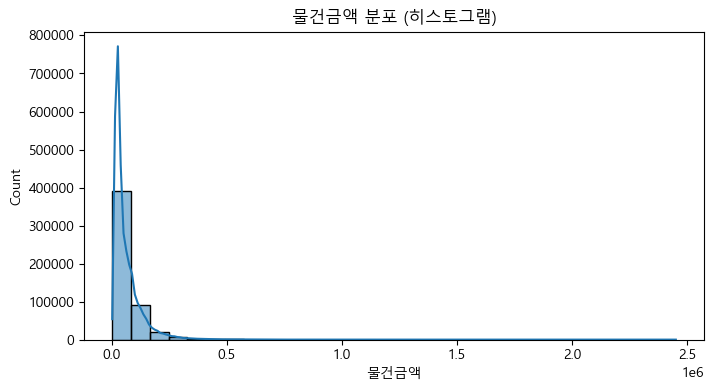

저장 완료: C:/ZIPcoding/plots/건물면적_histogram.png


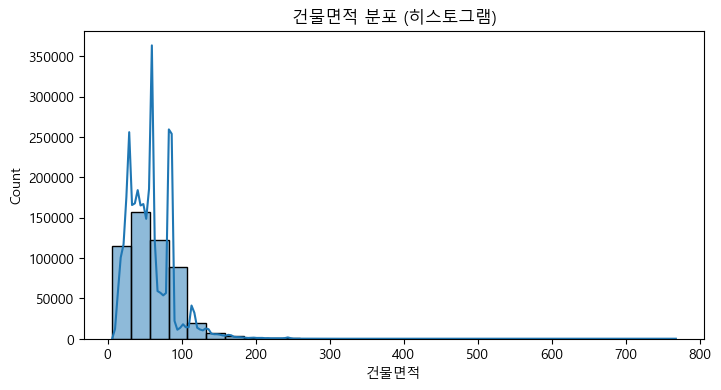

저장 완료: C:/ZIPcoding/plots/토지면적_histogram.png


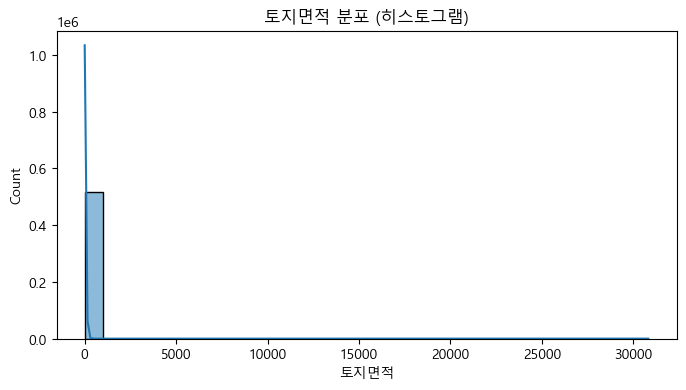

저장 완료: C:/ZIPcoding/plots/층_histogram.png


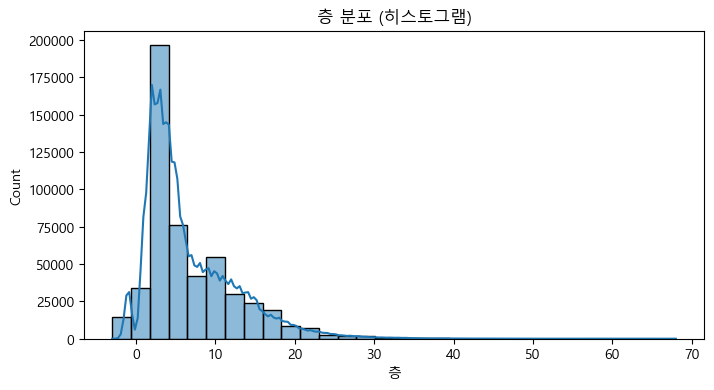

저장 완료: C:/ZIPcoding/plots/건축년도_histogram.png


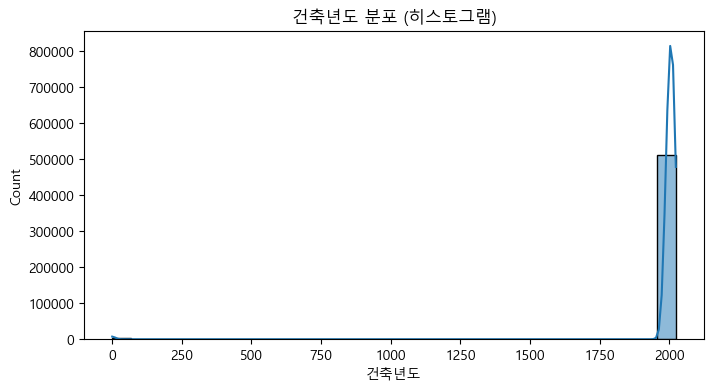

저장 완료: C:/ZIPcoding/plots/건물면적정수_histogram.png


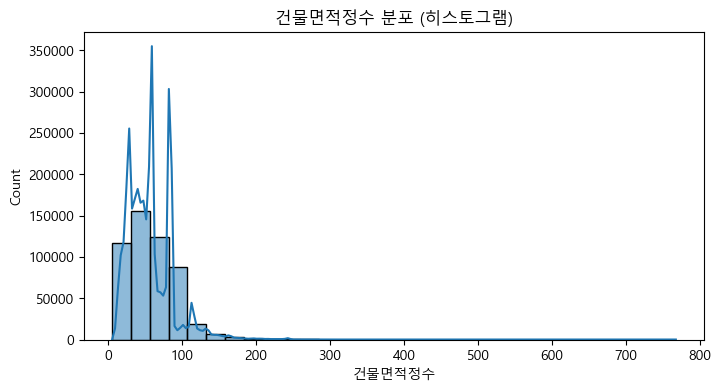

저장 완료: C:/ZIPcoding/plots/이전 실거래가_histogram.png


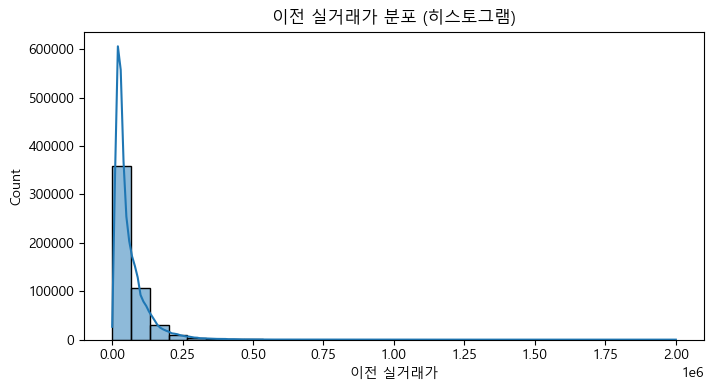

저장 완료: C:/ZIPcoding/plots/자치구최근6개월거래량_histogram.png


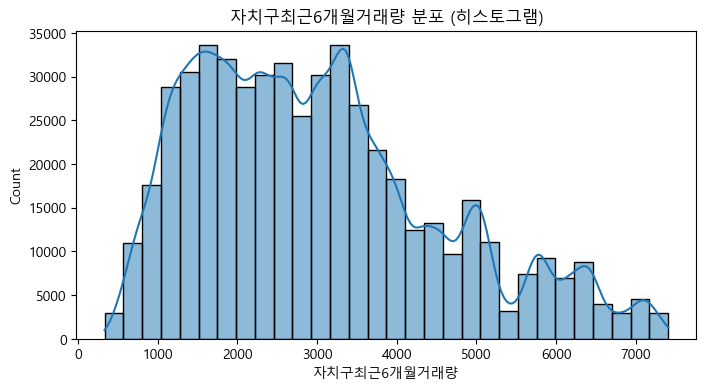

저장 완료: C:/ZIPcoding/plots/자치구최근6개월평균금액_histogram.png


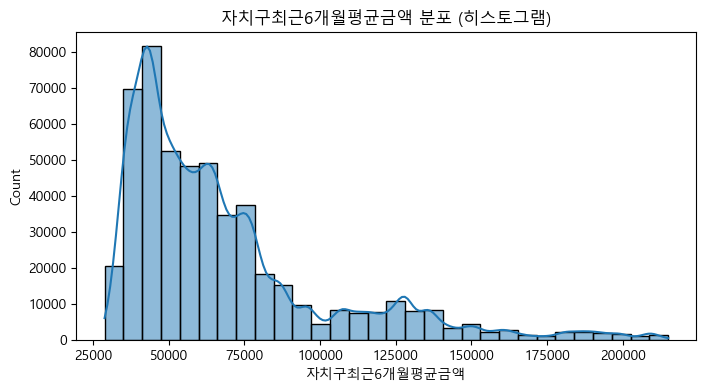

저장 완료: C:/ZIPcoding/plots/동최근6개월거래량_histogram.png


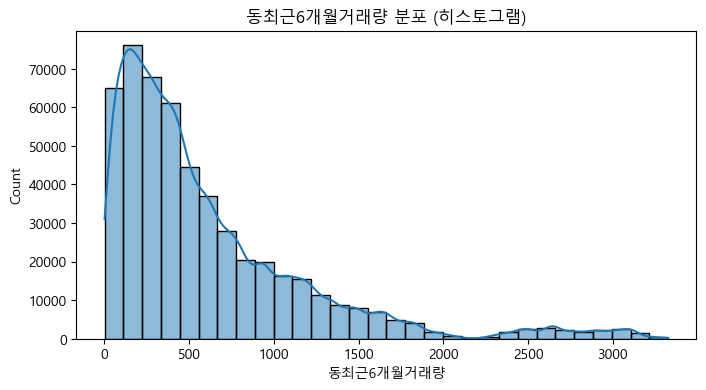

저장 완료: C:/ZIPcoding/plots/동최근6개월평균금액_histogram.png


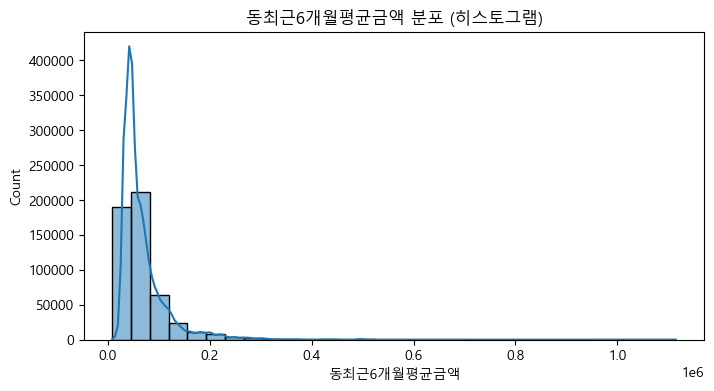

저장 완료: C:/ZIPcoding/plots/한국은행 기준금리_histogram.png


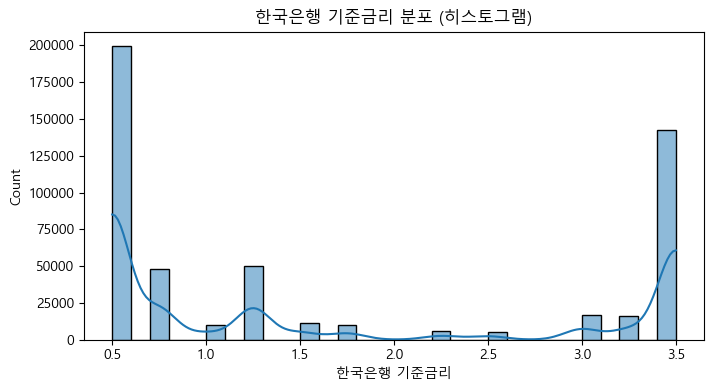

저장 완료: C:/ZIPcoding/plots/고정형 주택담보대출_histogram.png


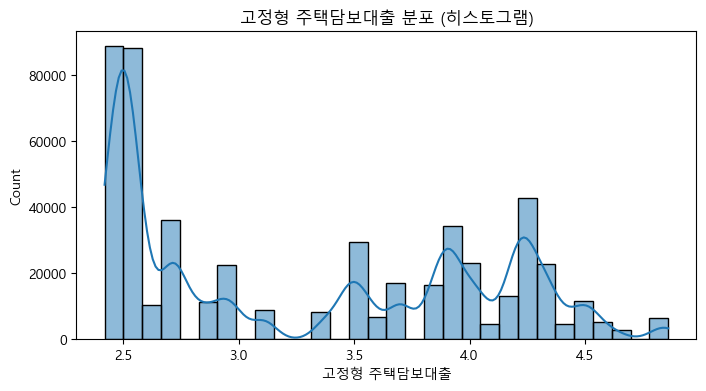

저장 완료: C:/ZIPcoding/plots/수도권아파트입주물량_histogram.png


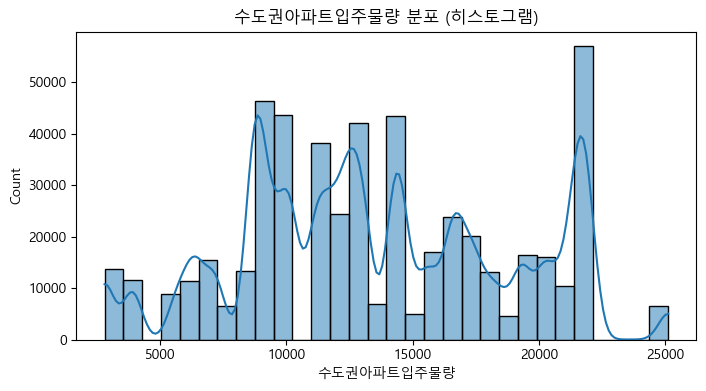

저장 완료: C:/ZIPcoding/plots/최근접역_연결역개수_histogram.png


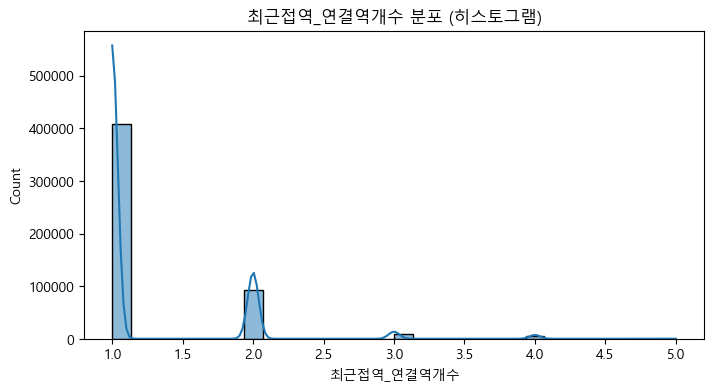

저장 완료: C:/ZIPcoding/plots/최근접역_직선거리_histogram.png


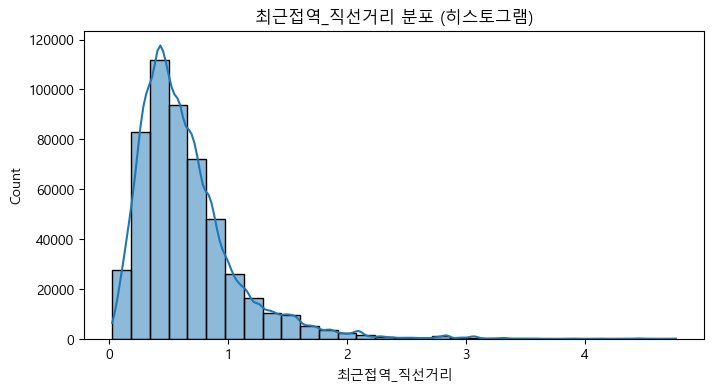

In [507]:
import matplotlib.pyplot as plt
import seaborn as sns

# 수치형 변수 히스토그램 그리기
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title(f"{col} 분포 (히스토그램)")
    
    # 히스토그램 저장
    hist_filename = f"{save_path}{col}_histogram.png"
    plt.savefig(hist_filename, dpi=300)
    print(f"저장 완료: {hist_filename}")
    
    plt.show()
    plt.close()


### 범주형 변수 EDA

In [689]:
# 범주형 변수만 선택
cat_cols = df.select_dtypes(include=["object"]).columns
cat_cols = ['자치구코드', '법정동코드', '자치구명', '법정동명', '건물용도', '최근접역', '최근접역_환승역구분', '면적구분', '서울5대학군지여부', '한강변여부', '면적구분']

In [691]:
# 각 범주형 변수별 고유값 개수 확인
for col in cat_cols:
    print(f"{col}의 고유값 개수: {df[col].nunique()}개")
    print(df[col].value_counts().head(10))  # 상위 10개 값 확인
    print("\n")

자치구코드의 고유값 개수: 25개
자치구코드
11500    41870
11710    32658
11380    32640
11530    25812
11350    25690
11740    25509
11680    24017
11470    23915
11440    22506
11560    21463
Name: count, dtype: int64


법정동코드의 고유값 개수: 82개
법정동코드
10200    70620
10300    69049
10100    60525
10500    42342
10700    40264
10800    35848
10600    33668
10900    24412
10400    21035
11000     9440
Name: count, dtype: int64


자치구명의 고유값 개수: 25개
자치구명
강서구     41870
송파구     32658
은평구     32640
구로구     25812
노원구     25690
강동구     25509
강남구     24017
양천구     23915
마포구     22506
영등포구    21463
Name: count, dtype: int64


법정동명의 고유값 개수: 388개
법정동명
화곡동    19275
상계동    10560
신림동     9342
봉천동     8926
구로동     8620
신월동     8597
목동      8309
창동      7685
수유동     7334
서초동     7142
Name: count, dtype: int64


건물용도의 고유값 개수: 4개
건물용도
아파트      237330
연립다세대    207006
오피스텔      70735
단독다가구        12
Name: count, dtype: int64


최근접역의 고유값 개수: 326개
최근접역
까치산      11540
화곡        9157
금천구청역     8122
쌍문        7507
응암        6623
상계      

In [ ]:
df["최근접역_환승역구분"] = df["최근접역_환승역구분"].replace("도시철도 일반역", "일반역")

In [86]:
df["최근접역_노선"] = df["최근접역_노선"].apply(lambda x: ["공항철도" if station == "공항" else station for station in x])
df["최근접역_노선"] = df["최근접역_노선"].apply(lambda x: ["공항철도" if station == "인천국제공항선" else station for station in x])

In [146]:
df["최근접역_노선"] = df["최근접역_노선"].apply(lambda x: ["경의중앙선" if station == "경의선" else station for station in x])

In [ ]:
# 리스트 내 특정 원소 변경하는 함수
def update_line_names(line_list):
    return ["경의중앙선" if line == "경의중앙" else "경춘선" if line == "경춘" else line for line in line_list]

# 데이터프레임 적용
df["최근접역_노선"] = df["최근접역_노선"].apply(update_line_names)


#### 분당선 -> 수인분당선, 신분당선으로 나누려고 함

In [11]:
df[df["최근접역_노선"].apply(lambda x: "분당선" in x)]['최근접역'].value_counts()

최근접역
수서              1871
구룡역             1708
청량리역            1337
한티역             1336
선릉역              980
선릉               975
서울숲역             767
대모산입구역           736
압구정로데오역          663
선정릉역             567
왕십리역             530
강남구청역            529
도곡역              511
수서역              419
청량리(서울시립대입구)     325
도곡               266
왕십리(성동구청)        225
개포동역             157
강남구청             153
복정                31
복정역               18
Name: count, dtype: int64

- '선릉', '선릉역' 처럼 동일 역인데 '역' 글자 포함 유무로 다르게 들어가 있는 것 발견
- 데이터 통합하기 전에 '선릉'으로 되어 있는 데이터들과 '선릉역'으로 되어 있는 데이터들의 지하철역 노선 정보가 일치하는지 확인 

In [21]:
# '역'으로 끝나는 유일값 찾기
unique_stations = df["최근접역"].unique()  # 유일한 값 가져오기
station_list = [station for station in unique_stations if isinstance(station, str) and station.endswith("역")]

# 결과 출력
print(station_list)


['수색역', '구일역', '구로역', '금천구청역', '월계역', '상봉역', '창동역', '온수역', '망우역', '신도림역', '홍대입구역', '개봉역', '남영역', '회기역', '왕십리역', '녹천역', '가좌역', '한남역', '오류동역', '광운대역', '서울숲역', '대방역', '영등포역', '외대앞역', '중랑역', '한티역', '신촌역', '독산역', '신이문역', '응봉역', '도곡역', '서강대역', '선릉역', '공덕역', '방학역', '석계역', '청량리역', '신길역', '선정릉역', '용산역', '구룡역', '도봉역', '수서역', '신내역', '대모산입구역', '압구정로데오역', '가산디지털단지역', '효창공원앞역', '이촌역', '디지털미디어시티역', '서빙고역', '복정역', '강남구청역', '노량진역', '서울역', '옥수역', '개포동역', '도봉산역']


In [30]:
import pandas as pd

# '역'이 포함된 지하철역 리스트
station_list = ['수색역', '구일역', '구로역', '금천구청역', '월계역', '상봉역', '창동역', '온수역', '망우역', 
                '신도림역', '홍대입구역', '개봉역', '남영역', '회기역', '왕십리역', '녹천역', '가좌역', '한남역', 
                '오류동역', '광운대역', '서울숲역', '대방역', '영등포역', '외대앞역', '중랑역', '한티역', '신촌역', 
                '독산역', '신이문역', '응봉역', '도곡역', '서강대역', '선릉역', '공덕역', '방학역', '석계역', '청량리역', 
                '신길역', '선정릉역', '용산역', '구룡역', '도봉역', '수서역', '신내역', '대모산입구역', '압구정로데오역', 
                '가산디지털단지역', '효창공원앞역', '이촌역', '디지털미디어시티역', '서빙고역', '복정역', '강남구청역', 
                '노량진역', '서울역', '옥수역', '개포동역', '도봉산역']

# '역'을 뺀 리스트 생성
station_list_no_suffix = [station[:-1] for station in station_list]

# 결과 저장할 리스트
mismatch_results = []

# 비교 수행
for full_name, short_name in zip(station_list, station_list_no_suffix):
    # '역'이 포함된 데이터
    df_full = df[df["최근접역"] == full_name][["최근접역_노선"]]
    
    # '역'을 뺀 데이터
    df_short = df[df["최근접역"] == short_name][["최근접역_노선"]]
    
    # 둘 다 존재하는 경우 비교
    if not df_full.empty and not df_short.empty:
        if not df_full["최근접역_노선"].equals(df_short["최근접역_노선"]):  # 노선 정보만 비교
            # DataFrame 병합 (동시에 출력)
            df_compare = pd.concat([df_full.reset_index(), df_short.reset_index()], axis=1)
            df_compare.columns = ["index_full", "노선_full", "index_short", "노선_short"]
            
            # 노선 동일 여부 	[3호선, GTX-A, 분당선]	체크
            df_compare["노선 동일 여부"] = df_compare["노선_full"] == df_compare["노선_short"]
            
            # 결과 저장
            mismatch_results.append((full_name, short_name, df_compare))

# 결과 출력
if mismatch_results:
    for full, short, df_mismatch in mismatch_results:
        print(f"\n {full} ↔ {short} 차이 발견!")
        display(df_mismatch)
else:
    print("모든 역에서 '역'을 뺀 경우에도 '최근접역_노선'이 동일함.")



⚠️ 상봉역 ↔ 상봉 차이 발견!


,index_full,노선_full,index_short,노선_short,노선 동일 여부
0,78.0,"[7호선, 경의중앙선, 경춘선]",323,"[7호선, 경의중앙선, 경춘선]",True
1,473.0,"[7호선, 경의중앙선, 경춘선]",1103,"[7호선, 경의중앙선, 경춘선]",True
2,671.0,"[7호선, 경의중앙선, 경춘선]",1210,"[7호선, 경의중앙선, 경춘선]",True
3,1733.0,"[7호선, 경의중앙선, 경춘선]",1212,"[7호선, 경의중앙선, 경춘선]",True
4,6385.0,"[7호선, 경의중앙선, 경춘선]",1925,"[7호선, 경의중앙선, 경춘선]",True
...,...,...,...,...,...
1026,NaN,NaN,513310,"[7호선, 경의중앙선, 경춘선]",False
1027,NaN,NaN,513325,"[7호선, 경의중앙선, 경춘선]",False
1028,NaN,NaN,513331,"[7호선, 경의중앙선, 경춘선]",False
1029,NaN,NaN,513332,"[7호선, 경의중앙선, 경춘선]",False



⚠️ 창동역 ↔ 창동 차이 발견!


,index_full,노선_full,index_short,노선_short,노선 동일 여부
0,79,"[4호선, 경원선]",36.0,"[1호선, 4호선]",False
1,122,"[4호선, 경원선]",101.0,"[1호선, 4호선]",False
2,140,"[4호선, 경원선]",602.0,"[1호선, 4호선]",False
3,624,"[4호선, 경원선]",832.0,"[1호선, 4호선]",False
4,1252,"[4호선, 경원선]",1183.0,"[1호선, 4호선]",False
...,...,...,...,...,...
1484,512953,"[4호선, 경원선]",NaN,NaN,False
1485,514015,"[4호선, 경원선]",NaN,NaN,False
1486,514304,"[4호선, 경원선]",NaN,NaN,False
1487,514315,"[4호선, 경원선]",NaN,NaN,False



⚠️ 신도림역 ↔ 신도림 차이 발견!


,index_full,노선_full,index_short,노선_short,노선 동일 여부
0,100,"[2호선, 경부선]",414.0,"[1호선, 2호선, 2호선]",False
1,288,"[2호선, 경부선]",512.0,"[1호선, 2호선, 2호선]",False
2,534,"[2호선, 경부선]",1448.0,"[1호선, 2호선, 2호선]",False
3,1112,"[2호선, 경부선]",2787.0,"[1호선, 2호선, 2호선]",False
4,1249,"[2호선, 경부선]",3564.0,"[1호선, 2호선, 2호선]",False
...,...,...,...,...,...
1608,514512,"[2호선, 경부선]",NaN,NaN,False
1609,514962,"[2호선, 경부선]",NaN,NaN,False
1610,514964,"[2호선, 경부선]",NaN,NaN,False
1611,515020,"[2호선, 경부선]",NaN,NaN,False



⚠️ 홍대입구역 ↔ 홍대입구 차이 발견!


,index_full,노선_full,index_short,노선_short,노선 동일 여부
0,109,"[2호선, 경의중앙선, 공항]",2736.0,"[2호선, 경의중앙선, 공항]",True
1,485,"[2호선, 경의중앙선, 공항]",4684.0,"[2호선, 경의중앙선, 공항]",True
2,1090,"[2호선, 경의중앙선, 공항]",6829.0,"[2호선, 경의중앙선, 공항]",True
3,1717,"[2호선, 경의중앙선, 공항]",7666.0,"[2호선, 경의중앙선, 공항]",True
4,1753,"[2호선, 경의중앙선, 공항]",8888.0,"[2호선, 경의중앙선, 공항]",True
...,...,...,...,...,...
1076,513450,"[2호선, 경의중앙선, 공항]",NaN,NaN,False
1077,513451,"[2호선, 경의중앙선, 공항]",NaN,NaN,False
1078,513458,"[2호선, 경의중앙선, 공항]",NaN,NaN,False
1079,514078,"[2호선, 경의중앙선, 공항]",NaN,NaN,False



⚠️ 대방역 ↔ 대방 차이 발견!


,index_full,노선_full,index_short,노선_short,노선 동일 여부
0,231,"[경부선, 신림선]",6949.0,"[1호선, 신림선]",False
1,1209,"[경부선, 신림선]",6962.0,"[1호선, 신림선]",False
2,1317,"[경부선, 신림선]",9285.0,"[1호선, 신림선]",False
3,1917,"[경부선, 신림선]",10524.0,"[1호선, 신림선]",False
4,3271,"[경부선, 신림선]",13123.0,"[1호선, 신림선]",False
...,...,...,...,...,...
387,512768,"[경부선, 신림선]",NaN,NaN,False
388,513067,"[경부선, 신림선]",NaN,NaN,False
389,513113,"[경부선, 신림선]",NaN,NaN,False
390,513163,"[경부선, 신림선]",NaN,NaN,False



⚠️ 도곡역 ↔ 도곡 차이 발견!


,index_full,노선_full,index_short,노선_short,노선 동일 여부
0,378,"[3호선, 분당선]",944.0,"[3호선, 분당선]",True
1,1835,"[3호선, 분당선]",2761.0,"[3호선, 분당선]",True
2,2974,"[3호선, 분당선]",9577.0,"[3호선, 분당선]",True
3,3005,"[3호선, 분당선]",19289.0,"[3호선, 분당선]",True
4,5961,"[3호선, 분당선]",21592.0,"[3호선, 분당선]",True
...,...,...,...,...,...
506,508253,"[3호선, 분당선]",NaN,NaN,False
507,509288,"[3호선, 분당선]",NaN,NaN,False
508,509660,"[3호선, 분당선]",NaN,NaN,False
509,510959,"[3호선, 분당선]",NaN,NaN,False



⚠️ 선릉역 ↔ 선릉 차이 발견!


,index_full,노선_full,index_short,노선_short,노선 동일 여부
0,399,"[2호선, 분당선]",551.0,"[2호선, 분당선]",True
1,1341,"[2호선, 분당선]",567.0,"[2호선, 분당선]",True
2,1680,"[2호선, 분당선]",1742.0,"[2호선, 분당선]",True
3,1969,"[2호선, 분당선]",2849.0,"[2호선, 분당선]",True
4,2228,"[2호선, 분당선]",2905.0,"[2호선, 분당선]",True
...,...,...,...,...,...
975,513704,"[2호선, 분당선]",NaN,NaN,False
976,514426,"[2호선, 분당선]",NaN,NaN,False
977,514991,"[2호선, 분당선]",NaN,NaN,False
978,515077,"[2호선, 분당선]",NaN,NaN,False



⚠️ 공덕역 ↔ 공덕 차이 발견!


,index_full,노선_full,index_short,노선_short,노선 동일 여부
0,572.0,"[5호선, 6호선, 경의중앙선, 공항]",306,"[5호선, 6호선]",False
1,599.0,"[5호선, 6호선, 경의중앙선, 공항]",703,"[5호선, 6호선]",False
2,879.0,"[5호선, 6호선, 경의중앙선, 공항]",721,"[5호선, 6호선]",False
3,956.0,"[5호선, 6호선, 경의중앙선, 공항]",729,"[5호선, 6호선]",False
4,1311.0,"[5호선, 6호선, 경의중앙선, 공항]",938,"[5호선, 6호선]",False
...,...,...,...,...,...
1442,NaN,NaN,513463,"[5호선, 6호선]",False
1443,NaN,NaN,513482,"[5호선, 6호선]",False
1444,NaN,NaN,513483,"[5호선, 6호선]",False
1445,NaN,NaN,513587,"[5호선, 6호선]",False



⚠️ 석계역 ↔ 석계 차이 발견!


,index_full,노선_full,index_short,노선_short,노선 동일 여부
0,678,"[6호선, 경원선]",8.0,"[1호선, 6호선]",False
1,695,"[6호선, 경원선]",128.0,"[1호선, 6호선]",False
2,749,"[6호선, 경원선]",521.0,"[1호선, 6호선]",False
3,1193,"[6호선, 경원선]",594.0,"[1호선, 6호선]",False
4,2455,"[6호선, 경원선]",640.0,"[1호선, 6호선]",False
...,...,...,...,...,...
844,513708,"[6호선, 경원선]",NaN,NaN,False
845,513807,"[6호선, 경원선]",NaN,NaN,False
846,513809,"[6호선, 경원선]",NaN,NaN,False
847,513860,"[6호선, 경원선]",NaN,NaN,False



⚠️ 신길역 ↔ 신길 차이 발견!


,index_full,노선_full,index_short,노선_short,노선 동일 여부
0,779.0,"[5호선, 경부선]",806,"[1호선, 5호선]",False
1,1289.0,"[5호선, 경부선]",2352,"[1호선, 5호선]",False
2,5342.0,"[5호선, 경부선]",2353,"[1호선, 5호선]",False
3,5676.0,"[5호선, 경부선]",2354,"[1호선, 5호선]",False
4,6024.0,"[5호선, 경부선]",2690,"[1호선, 5호선]",False
...,...,...,...,...,...
983,NaN,NaN,512840,"[1호선, 5호선]",False
984,NaN,NaN,513452,"[1호선, 5호선]",False
985,NaN,NaN,514492,"[1호선, 5호선]",False
986,NaN,NaN,514716,"[1호선, 5호선]",False



⚠️ 선정릉역 ↔ 선정릉 차이 발견!


,index_full,노선_full,index_short,노선_short,노선 동일 여부
0,804,"[9호선, 분당선]",2400.0,"[9호선, 수인분당선]",False
1,1118,"[9호선, 분당선]",5258.0,"[9호선, 수인분당선]",False
2,2070,"[9호선, 분당선]",7331.0,"[9호선, 수인분당선]",False
3,2318,"[9호선, 분당선]",7333.0,"[9호선, 수인분당선]",False
4,3480,"[9호선, 분당선]",9287.0,"[9호선, 수인분당선]",False
...,...,...,...,...,...
562,509433,"[9호선, 분당선]",NaN,NaN,False
563,509897,"[9호선, 분당선]",NaN,NaN,False
564,510379,"[9호선, 분당선]",NaN,NaN,False
565,511473,"[9호선, 분당선]",NaN,NaN,False



⚠️ 수서역 ↔ 수서 차이 발견!


,index_full,노선_full,index_short,노선_short,노선 동일 여부
0,945.0,"[3호선, GTX-A, 분당선]",611,"[3호선, 분당선]",False
1,947.0,"[3호선, GTX-A, 분당선]",864,"[3호선, 분당선]",False
2,3926.0,"[3호선, GTX-A, 분당선]",1573,"[3호선, 분당선]",False
3,7429.0,"[3호선, GTX-A, 분당선]",1585,"[3호선, 분당선]",False
4,8386.0,"[3호선, GTX-A, 분당선]",1641,"[3호선, 분당선]",False
...,...,...,...,...,...
1866,NaN,NaN,513590,"[3호선, 분당선]",False
1867,NaN,NaN,513640,"[3호선, 분당선]",False
1868,NaN,NaN,514026,"[3호선, 분당선]",False
1869,NaN,NaN,514583,"[3호선, 분당선]",False



⚠️ 신내역 ↔ 신내 차이 발견!


,index_full,노선_full,index_short,노선_short,노선 동일 여부
0,1063,"[6호선, 경춘선]",1964.0,[6호선],False
1,1515,"[6호선, 경춘선]",2083.0,[6호선],False
2,1546,"[6호선, 경춘선]",3556.0,[6호선],False
3,2334,"[6호선, 경춘선]",5183.0,[6호선],False
4,2727,"[6호선, 경춘선]",6905.0,[6호선],False
...,...,...,...,...,...
778,510722,"[6호선, 경춘선]",NaN,NaN,False
779,511234,"[6호선, 경춘선]",NaN,NaN,False
780,513563,"[6호선, 경춘선]",NaN,NaN,False
781,513567,"[6호선, 경춘선]",NaN,NaN,False



⚠️ 가산디지털단지역 ↔ 가산디지털단지 차이 발견!


,index_full,노선_full,index_short,노선_short,노선 동일 여부
0,1396.0,"[7호선, 경부선]",243,"[1호선, 7호선]",False
1,2376.0,"[7호선, 경부선]",2784,"[1호선, 7호선]",False
2,4026.0,"[7호선, 경부선]",3386,"[1호선, 7호선]",False
3,4318.0,"[7호선, 경부선]",5506,"[1호선, 7호선]",False
4,5045.0,"[7호선, 경부선]",6295,"[1호선, 7호선]",False
...,...,...,...,...,...
1329,NaN,NaN,512796,"[1호선, 7호선]",False
1330,NaN,NaN,514291,"[1호선, 7호선]",False
1331,NaN,NaN,514737,"[1호선, 7호선]",False
1332,NaN,NaN,514767,"[1호선, 7호선]",False



⚠️ 효창공원앞역 ↔ 효창공원앞 차이 발견!


,index_full,노선_full,index_short,노선_short,노선 동일 여부
0,1948,"[6호선, 경의중앙선]",565.0,"[6호선, 경의중앙선]",True
1,2136,"[6호선, 경의중앙선]",609.0,"[6호선, 경의중앙선]",True
2,2703,"[6호선, 경의중앙선]",1397.0,"[6호선, 경의중앙선]",True
3,2895,"[6호선, 경의중앙선]",2651.0,"[6호선, 경의중앙선]",True
4,2964,"[6호선, 경의중앙선]",2652.0,"[6호선, 경의중앙선]",True
...,...,...,...,...,...
836,510006,"[6호선, 경의중앙선]",NaN,NaN,False
837,510433,"[6호선, 경의중앙선]",NaN,NaN,False
838,511517,"[6호선, 경의중앙선]",NaN,NaN,False
839,512159,"[6호선, 경의중앙선]",NaN,NaN,False



⚠️ 디지털미디어시티역 ↔ 디지털미디어시티 차이 발견!


,index_full,노선_full,index_short,노선_short,노선 동일 여부
0,2201.0,"[6호선, 경의선, 공항]",107,"[6호선, 경의중앙선, 공항]",False
1,4400.0,"[6호선, 경의선, 공항]",130,"[6호선, 경의중앙선, 공항]",False
2,4402.0,"[6호선, 경의선, 공항]",339,"[6호선, 경의중앙선, 공항]",False
3,4618.0,"[6호선, 경의선, 공항]",1060,"[6호선, 경의중앙선, 공항]",False
4,4619.0,"[6호선, 경의선, 공항]",1281,"[6호선, 경의중앙선, 공항]",False
...,...,...,...,...,...
534,NaN,NaN,508449,"[6호선, 경의중앙선, 공항]",False
535,NaN,NaN,508754,"[6호선, 경의중앙선, 공항]",False
536,NaN,NaN,510416,"[6호선, 경의중앙선, 공항]",False
537,NaN,NaN,510851,"[6호선, 경의중앙선, 공항]",False



⚠️ 복정역 ↔ 복정 차이 발견!


,index_full,노선_full,index_short,노선_short,노선 동일 여부
0,2734.0,"[8호선, 분당선]",3359,"[8호선, 분당선]",True
1,70113.0,"[8호선, 분당선]",17797,"[8호선, 분당선]",True
2,88866.0,"[8호선, 분당선]",29877,"[8호선, 분당선]",True
3,93754.0,"[8호선, 분당선]",85777,"[8호선, 분당선]",True
4,94238.0,"[8호선, 분당선]",113907,"[8호선, 분당선]",True
5,162088.0,"[8호선, 분당선]",121407,"[8호선, 분당선]",True
6,204579.0,"[8호선, 분당선]",133744,"[8호선, 분당선]",True
7,216750.0,"[8호선, 분당선]",144076,"[8호선, 분당선]",True
8,221324.0,"[8호선, 분당선]",144365,"[8호선, 분당선]",True
9,229590.0,"[8호선, 분당선]",146792,"[8호선, 분당선]",True



⚠️ 강남구청역 ↔ 강남구청 차이 발견!


,index_full,노선_full,index_short,노선_short,노선 동일 여부
0,3163,"[7호선, 분당선]",2512.0,"[7호선, 분당선]",True
1,3243,"[7호선, 분당선]",7995.0,"[7호선, 분당선]",True
2,5005,"[7호선, 분당선]",8500.0,"[7호선, 분당선]",True
3,7047,"[7호선, 분당선]",9072.0,"[7호선, 분당선]",True
4,11455,"[7호선, 분당선]",18407.0,"[7호선, 분당선]",True
...,...,...,...,...,...
524,509116,"[7호선, 분당선]",NaN,NaN,False
525,509471,"[7호선, 분당선]",NaN,NaN,False
526,510180,"[7호선, 분당선]",NaN,NaN,False
527,512366,"[7호선, 분당선]",NaN,NaN,False



⚠️ 노량진역 ↔ 노량진 차이 발견!


,index_full,노선_full,index_short,노선_short,노선 동일 여부
0,3211.0,"[9호선, 경부선]",2292,"[9호선, 경부선]",True
1,5254.0,"[9호선, 경부선]",3872,"[9호선, 경부선]",True
2,11587.0,"[9호선, 경부선]",4388,"[9호선, 경부선]",True
3,11592.0,"[9호선, 경부선]",6790,"[9호선, 경부선]",True
4,12569.0,"[9호선, 경부선]",9035,"[9호선, 경부선]",True
...,...,...,...,...,...
363,NaN,NaN,512865,"[9호선, 경부선]",False
364,NaN,NaN,513642,"[9호선, 경부선]",False
365,NaN,NaN,513768,"[9호선, 경부선]",False
366,NaN,NaN,514375,"[9호선, 경부선]",False



⚠️ 서울역 ↔ 서울 차이 발견!


,index_full,노선_full,index_short,노선_short,노선 동일 여부
0,3473.0,"[1호선, 4호선, 경의중앙선, 공항]",595,"[1호선, 4호선, 경의선, 인천국제공항선]",False
1,7222.0,"[1호선, 4호선, 경의중앙선, 공항]",1032,"[1호선, 4호선, 경의선, 인천국제공항선]",False
2,28720.0,"[1호선, 4호선, 경의중앙선, 공항]",1092,"[1호선, 4호선, 경의선, 인천국제공항선]",False
3,31138.0,"[1호선, 4호선, 경의중앙선, 공항]",1303,"[1호선, 4호선, 경의선, 인천국제공항선]",False
4,40385.0,"[1호선, 4호선, 경의중앙선, 공항]",1409,"[1호선, 4호선, 경의선, 인천국제공항선]",False
...,...,...,...,...,...
1401,NaN,NaN,508940,"[1호선, 4호선, 경의선, 인천국제공항선]",False
1402,NaN,NaN,509140,"[1호선, 4호선, 경의선, 인천국제공항선]",False
1403,NaN,NaN,509151,"[1호선, 4호선, 경의선, 인천국제공항선]",False
1404,NaN,NaN,509735,"[1호선, 4호선, 경의선, 인천국제공항선]",False



⚠️ 옥수역 ↔ 옥수 차이 발견!


,index_full,노선_full,index_short,노선_short,노선 동일 여부
0,4961.0,"[3호선, 경의중앙선]",2123,"[3호선, 경의중앙선]",True
1,5456.0,"[3호선, 경의중앙선]",3316,"[3호선, 경의중앙선]",True
2,14629.0,"[3호선, 경의중앙선]",3318,"[3호선, 경의중앙선]",True
3,18024.0,"[3호선, 경의중앙선]",3881,"[3호선, 경의중앙선]",True
4,22559.0,"[3호선, 경의중앙선]",4487,"[3호선, 경의중앙선]",True
...,...,...,...,...,...
787,NaN,NaN,512829,"[3호선, 경의중앙선]",False
788,NaN,NaN,513156,"[3호선, 경의중앙선]",False
789,NaN,NaN,513392,"[3호선, 경의중앙선]",False
790,NaN,NaN,513593,"[3호선, 경의중앙선]",False



⚠️ 도봉산역 ↔ 도봉산 차이 발견!


,index_full,노선_full,index_short,노선_short,노선 동일 여부
0,77528.0,"[7호선, 경원선]",689,"[1호선, 7호선]",False
1,131481.0,"[7호선, 경원선]",1256,"[1호선, 7호선]",False
2,142863.0,"[7호선, 경원선]",1915,"[1호선, 7호선]",False
3,188241.0,"[7호선, 경원선]",1955,"[1호선, 7호선]",False
4,219489.0,"[7호선, 경원선]",2366,"[1호선, 7호선]",False
...,...,...,...,...,...
1011,NaN,NaN,512184,"[1호선, 7호선]",False
1012,NaN,NaN,512325,"[1호선, 7호선]",False
1013,NaN,NaN,514154,"[1호선, 7호선]",False
1014,NaN,NaN,514422,"[1호선, 7호선]",False


In [34]:
# '상봉역'인 행들의 '최근접역_노선'을 ['7호선', '경의중앙선', '경춘선']으로 변경
df.loc[df["최근접역"] == "상봉역", "최근접역_노선"] = df.loc[df["최근접역"] == "상봉역", "최근접역_노선"].apply(lambda x: ['7호선', '경의중앙선', '경춘선'])

# '상봉역'을 '상봉'으로 변경
df.loc[df["최근접역"] == "상봉역", "최근접역"] = "상봉"

In [36]:
df.loc[df["최근접역"] == "창동역", "최근접역_노선"] = df.loc[df["최근접역"] == "창동역", "최근접역_노선"].apply(lambda x: ['1호선', '4호선'])
df.loc[df["최근접역"] == "창동역", "최근접역"] = "창동"

In [38]:
df.loc[df["최근접역"] == "신도림역", "최근접역_노선"] = df.loc[df["최근접역"] == "신도림역", "최근접역_노선"].apply(lambda x: ['1호선', '2호선'])
df.loc[df["최근접역"] == "신도림", "최근접역_노선"] = df.loc[df["최근접역"] == "신도림", "최근접역_노선"].apply(lambda x: ['1호선', '2호선'])
df.loc[df["최근접역"] == "신도림역", "최근접역"] = "신도림"

In [40]:
df.loc[df["최근접역"] == "홍대입구역", "최근접역_노선"] = df.loc[df["최근접역"] == "홍대입구역", "최근접역_노선"].apply(lambda x: ['2호선', '경의중앙선', '공항'])
df.loc[df["최근접역"] == "홍대입구", "최근접역_노선"] = df.loc[df["최근접역"] == "홍대입구", "최근접역_노선"].apply(lambda x: ['2호선', '경의중앙선', '공항'])
df.loc[df["최근접역"] == "홍대입구역", "최근접역"] = "홍대입구"

In [42]:
df.loc[df["최근접역"] == "대방역", "최근접역_노선"] = df.loc[df["최근접역"] == "대방역", "최근접역_노선"].apply(lambda x: ['1호선', '신림선'])
df.loc[df["최근접역"] == "대방", "최근접역_노선"] = df.loc[df["최근접역"] == "대방", "최근접역_노선"].apply(lambda x: ['1호선', '신림선'])
df.loc[df["최근접역"] == "대방역", "최근접역"] = "대방"

In [44]:
df.loc[df["최근접역"] == "도곡역", "최근접역_노선"] = df.loc[df["최근접역"] == "도곡역", "최근접역_노선"].apply(lambda x: ['3호선', '분당선'])
df.loc[df["최근접역"] == "도곡", "최근접역_노선"] = df.loc[df["최근접역"] == "도곡", "최근접역_노선"].apply(lambda x: ['3호선', '분당선'])
df.loc[df["최근접역"] == "도곡역", "최근접역"] = "도곡"

In [46]:
df.loc[df["최근접역"] == "선릉역", "최근접역_노선"] = df.loc[df["최근접역"] == "선릉역", "최근접역_노선"].apply(lambda x: ['2호선', '분당선'])
df.loc[df["최근접역"] == "선릉", "최근접역_노선"] = df.loc[df["최근접역"] == "선릉", "최근접역_노선"].apply(lambda x: ['2호선', '분당선'])
df.loc[df["최근접역"] == "선릉역", "최근접역"] = "선릉"

In [48]:
df.loc[df["최근접역"] == "공덕역", "최근접역_노선"] = df.loc[df["최근접역"] == "공덕역", "최근접역_노선"].apply(lambda x: ['5호선', '6호선', '경의중앙선', '공항철도'])
df.loc[df["최근접역"] == "공덕", "최근접역_노선"] = df.loc[df["최근접역"] == "공덕", "최근접역_노선"].apply(lambda x: ['5호선', '6호선', '경의중앙선', '공항철도'])
df.loc[df["최근접역"] == "공덕역", "최근접역"] = "공덕"

In [50]:
df.loc[df["최근접역"] == "석계역", "최근접역_노선"] = df.loc[df["최근접역"] == "석계역", "최근접역_노선"].apply(lambda x: ['1호선', '6호선'])
df.loc[df["최근접역"] == "석계", "최근접역_노선"] = df.loc[df["최근접역"] == "석계", "최근접역_노선"].apply(lambda x:  ['1호선', '6호선'])
df.loc[df["최근접역"] == "석계역", "최근접역"] = "석계"

In [52]:
df.loc[df["최근접역"] == "신길역", "최근접역_노선"] = df.loc[df["최근접역"] == "신길역", "최근접역_노선"].apply(lambda x: ['1호선', '5호선'])
df.loc[df["최근접역"] == "신길", "최근접역_노선"] = df.loc[df["최근접역"] == "신길", "최근접역_노선"].apply(lambda x:  ['1호선', '5호선'])
df.loc[df["최근접역"] == "신길역", "최근접역"] = "신길"

In [54]:
df.loc[df["최근접역"] == "선정릉역", "최근접역_노선"] = df.loc[df["최근접역"] == "선정릉역", "최근접역_노선"].apply(lambda x: ['9호선', '수인분당선'])
df.loc[df["최근접역"] == "선정릉", "최근접역_노선"] = df.loc[df["최근접역"] == "선정릉", "최근접역_노선"].apply(lambda x:  ['9호선', '수인분당선'])
df.loc[df["최근접역"] == "선정릉역", "최근접역"] = "선정릉"

In [56]:
df.loc[df["최근접역"] == "수서역", "최근접역_노선"] = df.loc[df["최근접역"] == "수서역", "최근접역_노선"].apply(lambda x: ['3호선', 'GTX-A', '수인분당선'])
df.loc[df["최근접역"] == "수서", "최근접역_노선"] = df.loc[df["최근접역"] == "수서", "최근접역_노선"].apply(lambda x:  ['3호선', 'GTX-A', '수인분당선'])
df.loc[df["최근접역"] == "수서역", "최근접역"] = "수서"

In [58]:
df.loc[df["최근접역"] == "신내역", "최근접역_노선"] = df.loc[df["최근접역"] == "신내역", "최근접역_노선"].apply(lambda x: ['6호선', '경춘선'])
df.loc[df["최근접역"] == "신내", "최근접역_노선"] = df.loc[df["최근접역"] == "신내", "최근접역_노선"].apply(lambda x:  ['6호선', '경춘선'])
df.loc[df["최근접역"] == "신내역", "최근접역"] = "신내"

In [60]:
df.loc[df["최근접역"] == "가산디지털단지역", "최근접역_노선"] = df.loc[df["최근접역"] == "가산디지털단지역", "최근접역_노선"].apply(lambda x: ['1호선', '7호선'])
df.loc[df["최근접역"] == "가산디지털단지", "최근접역_노선"] = df.loc[df["최근접역"] == "가산디지털단지", "최근접역_노선"].apply(lambda x:  ['1호선', '7호선'])
df.loc[df["최근접역"] == "가산디지털단지역", "최근접역"] = "가산디지털단지"

In [64]:
df.loc[df["최근접역"] == "디지털미디어시티역", "최근접역_노선"] = df.loc[df["최근접역"] == "디지털미디어시티역", "최근접역_노선"].apply(lambda x: ['6호선', '경의중앙선', '공항철도'])
df.loc[df["최근접역"] == "디지털미디어시티", "최근접역_노선"] = df.loc[df["최근접역"] == "디지털미디어시티", "최근접역_노선"].apply(lambda x:  ['6호선', '경의중앙선', '공항철도'])
df.loc[df["최근접역"] == "디지털미디어시티역", "최근접역"] = "디지털미디어시티"

In [68]:
df.loc[df["최근접역"] == "복정역", "최근접역_노선"] = df.loc[df["최근접역"] == "복정역", "최근접역_노선"].apply(lambda x: ['8호선', '수인분당선'])
df.loc[df["최근접역"] == "복정", "최근접역_노선"] = df.loc[df["최근접역"] == "복정", "최근접역_노선"].apply(lambda x:  ['8호선', '수인분당선'])
df.loc[df["최근접역"] == "복정역", "최근접역"] = "복정"

In [72]:
df.loc[df["최근접역"] == "강남구청역", "최근접역_노선"] = df.loc[df["최근접역"] == "강남구청역", "최근접역_노선"].apply(lambda x: ['7호선', '수인분당선'])
df.loc[df["최근접역"] == "강남구청", "최근접역_노선"] = df.loc[df["최근접역"] == "강남구청", "최근접역_노선"].apply(lambda x:  ['7호선', '수인분당선'])
df.loc[df["최근접역"] == "강남구청역", "최근접역"] = "강남구청"

In [74]:
df.loc[df["최근접역"] == "노량진역", "최근접역_노선"] = df.loc[df["최근접역"] == "노량진역", "최근접역_노선"].apply(lambda x: ['1호선', '9호선'])
df.loc[df["최근접역"] == "노량진", "최근접역_노선"] = df.loc[df["최근접역"] == "노량진", "최근접역_노선"].apply(lambda x:  ['1호선', '9호선'])
df.loc[df["최근접역"] == "노량진역", "최근접역"] = "노량진"

In [78]:
df.loc[df["최근접역"] == "서울역", "최근접역_노선"] = df.loc[df["최근접역"] == "서울역", "최근접역_노선"].apply(lambda x: ['1호선', '4호선', '경의중앙선', '공항철도'])
df.loc[df["최근접역"] == "서울", "최근접역_노선"] = df.loc[df["최근접역"] == "서울", "최근접역_노선"].apply(lambda x:  ['1호선', '4호선', '경의중앙선', '공항철도'])
df.loc[df["최근접역"] == "서울", "최근접역"] = "서울역"

In [80]:
df.loc[df["최근접역"] == "옥수역", "최근접역_노선"] = df.loc[df["최근접역"] == "옥수역", "최근접역_노선"].apply(lambda x: ['3호선', '경의중앙선']	)
df.loc[df["최근접역"] == "옥수", "최근접역_노선"] = df.loc[df["최근접역"] == "옥수", "최근접역_노선"].apply(lambda x:  ['3호선', '경의중앙선'])
df.loc[df["최근접역"] == "옥수역", "최근접역"] = "옥수"

In [82]:
df.loc[df["최근접역"] == "도봉산역", "최근접역_노선"] = df.loc[df["최근접역"] == "도봉산역", "최근접역_노선"].apply(lambda x: ['1호선', '7호선']	)
df.loc[df["최근접역"] == "도봉산", "최근접역_노선"] = df.loc[df["최근접역"] == "도봉산", "최근접역_노선"].apply(lambda x:  ['1호선', '7호선'])
df.loc[df["최근접역"] == "도봉산역", "최근접역"] = "도봉산"

In [92]:
# 모든 노선 정보 추출
unique_lines = set([line for sublist in df["최근접역_노선"] for line in sublist])
unique_lines

{'1호선',
 '2호선',
 '3호선',
 '4호선',
 '5호선',
 '6호선',
 '7호선',
 '8호선',
 '9호선',
 'GTX-A',
 '경부선',
 '경원선',
 '경의선',
 '경의중앙선',
 '경인선',
 '경춘선',
 '공항철도',
 '분당선',
 '수인분당선',
 '신림선',
 '신분당선',
 '우이신설선'}

In [90]:
df[df["최근접역_노선"].apply(lambda x: "경원선" in x)]['최근접역'].value_counts()

최근접역
방학역     3955
회기역     2171
월계역     1822
도봉역     1783
녹천역     1617
광운대역    1404
신이문역    1111
외대앞역    1061
Name: count, dtype: int64

In [94]:
df["최근접역_노선"] = df["최근접역_노선"].apply(lambda x: ["1호선" if station == "경원선" else station for station in x])

In [96]:
df[df["최근접역_노선"].apply(lambda x: "경인선" in x)]['최근접역'].value_counts()

최근접역
개봉역     5452
오류동역    4722
온수역     1721
구일역     1677
Name: count, dtype: int64

In [98]:
df["최근접역_노선"] = df["최근접역_노선"].apply(lambda x: ["1호선" if station == "경인선" else station for station in x])

In [104]:
# '역'으로 끝나는 유일값 찾기
unique_stations = df["최근접역"].unique()  # 유일한 값 가져오기
station_list = [station for station in unique_stations if isinstance(station, str) and station.endswith("역")]

# 결과 출력
print(station_list)


['수색역', '구일역', '구로역', '금천구청역', '월계역', '온수역', '망우역', '개봉역', '남영역', '회기역', '왕십리역', '녹천역', '가좌역', '한남역', '오류동역', '광운대역', '서울숲역', '영등포역', '외대앞역', '중랑역', '한티역', '신촌역', '독산역', '신이문역', '응봉역', '서강대역', '방학역', '서울역', '청량리역', '용산역', '구룡역', '도봉역', '대모산입구역', '압구정로데오역', '이촌역', '서빙고역', '개포동역']


In [106]:
# '서울역'을 제외한 '역'으로 끝나는 값들 변환
df["최근접역"] = df["최근접역"].apply(lambda x: x[:-1] if x.endswith("역") and x != "서울역" else x)

In [110]:
# '역'으로 끝나는 유일값 찾기
unique_stations = df["최근접역"].unique()  # 유일한 값 가져오기
station_list = [station for station in unique_stations if isinstance(station, str) and station.endswith("역")]

# 결과 출력
print(station_list)

['서울역']


In [114]:
unique_values_with_parentheses = df[df["최근접역"].str.contains(r"\(", na=False)]["최근접역"].unique()
print(unique_values_with_parentheses)


['월곡(동덕여대)' '화랑대(서울여대입구)' '용마산(용마폭포공원)' '아차산(어린이대공원후문)' '숭실대입구(살피재)'
 '충정로(경기대입구)' '낙성대(강감찬)' '수유(강북구청)' '증산(명지대앞)' '광흥창(서강)' '성신여대입구(돈암)'
 '광나루(장신대)' '양재(서초구청)' '굽은다리(강동구민회관앞)' '남부터미널(예술의전당)' '오목교(목동운동장앞)'
 '삼성(무역센터)' '대림(구로구청)' '상월곡(한국과학기술연구원)' '신정(은행정)' '강변(동서울터미널)'
 '이촌(국립중앙박물관)' '경복궁(정부서울청사)' '공릉(서울과학기술대)' '서울대입구(관악구청)' '천호(풍납토성)'
 '한성대입구(삼선교)' '총신대입구(이수)' '월드컵경기장(성산)' '온수(성공회대입구)' '왕십리(성동구청)'
 '봉화산(서울의료원)' '대흥(서강대앞)' '구의(광진구청)' '새절(신사)' '미아(서울사이버대학)' '녹사평(용산구청)'
 '숙대입구(갈월)' '고려대(종암)' '회현(남대문시장)' '자양(뚝섬한강공원)' '광화문(세종문화회관)' '교대(법원·검찰청)'
 '용두(동대문구청)' '서울역(경의선)' '삼각지(전쟁기념관)' '잠실(송파구청)' '동작(현충원)' '몽촌토성(평화의문)'
 '흑석(중앙대입구)' '신촌(지하)' '군자(능동)' '안암(고대병원앞)' '어린이대공원(세종대)' '동대문역사문화공원(DDP)'
 '청량리(서울시립대입구)' '종로3가(탑골공원)' '올림픽공원(한국체대)']


In [157]:
df["최근접역"] = df["최근접역"].str.replace(r"\(.*?\)", "", regex=True).str.strip()

In [159]:
unique_values_with_parentheses = df[df["최근접역"].str.contains(r"\(", na=False)]["최근접역"].unique()
print(unique_values_with_parentheses)


[]


In [169]:
# 리스트를 문자열로 변환하여 비교 가능하게 만들기
df["최근접역_노선_문자열"] = df["최근접역_노선"].apply(lambda x: ", ".join(sorted(x)) if isinstance(x, list) else str(x))

# '최근접역'을 기준으로 '최근접역_노선'이 여러 개 존재하는 경우 찾기
mismatch_stations = df.groupby("최근접역")["최근접역_노선_문자열"].nunique()

# '최근접역_노선'이 2개 이상인 경우 필터링
mismatch_stations = mismatch_stations[mismatch_stations > 1].index

In [171]:
mismatch_stations

Index(['서울역', '성신여대입구', '신촌'], dtype='object', name='최근접역')

In [173]:
df.loc[df["최근접역"] == "서울역", "최근접역_노선"] = df.loc[df["최근접역"] == "서울역", "최근접역_노선"].apply(lambda x: ['1호선', '4호선', '경의중앙선', '공항철도'])

In [179]:
df.loc[df["최근접역"] == "성신여대입구", "최근접역_노선"] = df.loc[df["최근접역"] == "성신여대입구", "최근접역_노선"].apply(lambda x: ['4호선'])

In [181]:
df.loc[df["최근접역"] == "신촌", "최근접역_노선"] = df.loc[df["최근접역"] == "신촌", "최근접역_노선"].apply(lambda x: ['2호선', '경의중앙선'])

df.info()

In [190]:
df.to_pickle('C:/ZIPcoding/dataset0221_jjin.pkl')

In [188]:
del df['순수역']
del df['최근접역_노선_문자열']

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 515083 entries, 0 to 515083
Data columns (total 40 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   접수연도          515083 non-null  int64         
 1   자치구코드         515083 non-null  object        
 2   자치구명          515083 non-null  object        
 3   법정동코드         515083 non-null  object        
 4   법정동명          515083 non-null  object        
 5   본번            515083 non-null  int64         
 6   부번            515083 non-null  int64         
 7   주소            515083 non-null  object        
 8   위도            515083 non-null  float64       
 9   경도            515083 non-null  float64       
 10  geometry      515083 non-null  object        
 11  건물명           515083 non-null  object        
 12  계약일           515083 non-null  datetime64[ns]
 13  실거래가          515083 non-null  int64         
 14  평당가격          515083 non-null  int32         
 15  건물면적          515083 n

In [118]:
df[df["최근접역_노선"].apply(lambda x: "분당선" in x)]['최근접역'].value_counts()

최근접역
구룡              1708
청량리             1337
한티              1336
도곡               777
서울숲              767
대모산입구            736
압구정로데오           663
왕십리              530
청량리(서울시립대입구)     325
왕십리(성동구청)        225
개포동              157
Name: count, dtype: int64

In [102]:
# '최근접역'이 '선릉'인 행에서 '최근접역_노선' 리스트 안의 '분당선'을 '수인분당선'으로 변경
df.loc[df["최근접역"] == "선릉", "최근접역_노선"] = df.loc[df["최근접역"] == "선릉", "최근접역_노선"].apply(
    lambda x: ["수인분당선" if line == "분당선" else line for line in x]
)

In [120]:
df.loc[df["최근접역"] == "구룡", "최근접역_노선"] = df.loc[df["최근접역"] == "구룡", "최근접역_노선"].apply(
    lambda x: ["수인분당선" if line == "분당선" else line for line in x]
)

In [122]:
df.loc[df["최근접역"] == "청량리", "최근접역_노선"] = df.loc[df["최근접역"] == "청량리", "최근접역_노선"].apply(
    lambda x: ["수인분당선" if line == "분당선" else line for line in x]
)

In [124]:
df.loc[df["최근접역"] == "한티", "최근접역_노선"] = df.loc[df["최근접역"] == "한티", "최근접역_노선"].apply(
    lambda x: ["수인분당선" if line == "분당선" else line for line in x]
)

In [126]:
df.loc[df["최근접역"] == "도곡", "최근접역_노선"] = df.loc[df["최근접역"] == "도곡", "최근접역_노선"].apply(
    lambda x: ["수인분당선" if line == "분당선" else line for line in x]
)

In [130]:
df.loc[df["최근접역"] == "서울숲", "최근접역_노선"] = df.loc[df["최근접역"] == "서울숲", "최근접역_노선"].apply(
    lambda x: ["수인분당선" if line == "분당선" else line for line in x]
)

In [132]:
df.loc[df["최근접역"] == "대모산입구", "최근접역_노선"] = df.loc[df["최근접역"] == "대모산입구", "최근접역_노선"].apply(
    lambda x: ["수인분당선" if line == "분당선" else line for line in x]
)

In [134]:
df.loc[df["최근접역"] == "압구정로데오", "최근접역_노선"] = df.loc[df["최근접역"] == "압구정로데오", "최근접역_노선"].apply(
    lambda x: ["수인분당선" if line == "분당선" else line for line in x]
)

In [136]:
df.loc[df["최근접역"] == "왕십리", "최근접역_노선"] = df.loc[df["최근접역"] == "왕십리", "최근접역_노선"].apply(
    lambda x: ["수인분당선" if line == "분당선" else line for line in x]
)

In [138]:
df.loc[df["최근접역"] == "청량리(서울시립대입구)", "최근접역_노선"] = df.loc[df["최근접역"] == "청량리(서울시립대입구)", "최근접역_노선"].apply(
    lambda x: ["수인분당선" if line == "분당선" else line for line in x]
)

In [140]:
df.loc[df["최근접역"] == "왕십리(성동구청)", "최근접역_노선"] = df.loc[df["최근접역"] == "왕십리(성동구청)", "최근접역_노선"].apply(
    lambda x: ["수인분당선" if line == "분당선" else line for line in x]
)

In [142]:
df.loc[df["최근접역"] == "개포동", "최근접역_노선"] = df.loc[df["최근접역"] == "개포동", "최근접역_노선"].apply(
    lambda x: ["수인분당선" if line == "분당선" else line for line in x]
)

In [9]:
# 저장된 피클 파일 불러오기
import pandas as pd
df = pd.read_pickle("C:/ZIPcoding/dataset0221_jjin.pkl")

In [11]:
df['최근접역_연결역개수'].value_counts()

최근접역_연결역개수
1    407394
2     92333
3      9905
4      5304
5       147
Name: count, dtype: int64

In [13]:
# 리스트 정렬 및 원소 개수 업데이트
df['최근접역_노선'] = df['최근접역_노선'].apply(lambda x: sorted(x) if isinstance(x, list) else x)
df['최근접역_연결역개수'] = df['최근접역_노선'].apply(lambda x: len(x) if isinstance(x, list) else 0)

In [14]:
df['최근접역_연결역개수'].value_counts()

최근접역_연결역개수
1    407231
2     90230
3     10724
4      6898
Name: count, dtype: int64

In [17]:
df['최근접역_환승역구분'].value_counts()

최근접역_환승역구분
일반역    409659
환승역    105424
Name: count, dtype: int64

In [19]:
# 최근접역_환승역구분 업데이트
df['최근접역_환승역구분'] = df['최근접역_연결역개수'].apply(lambda x: '환승역' if x >= 2 else ('일반역' if x == 1 else ''))

In [21]:
df['최근접역_환승역구분'].value_counts()

최근접역_환승역구분
일반역    407231
환승역    107852
Name: count, dtype: int64

In [23]:
df.to_pickle("C:/ZIPcoding/dataset0222.pkl")

In [693]:
# 범주형 변수들의 빈도수 확인
for col in cat_cols:
    value_counts = df[col].value_counts()
    rare_values = value_counts[value_counts < 10]  # 빈도가 10개 미만인 값 찾기
    print(f"📌 {col}에서 빈도수가 낮은 이상치 후보들:\n{rare_values}\n")


📌 자치구코드에서 빈도수가 낮은 이상치 후보들:
Series([], Name: count, dtype: int64)

📌 법정동코드에서 빈도수가 낮은 이상치 후보들:
법정동코드
14600    9
14700    9
14000    6
15000    5
Name: count, dtype: int64

📌 자치구명에서 빈도수가 낮은 이상치 후보들:
Series([], Name: count, dtype: int64)

📌 법정동명에서 빈도수가 낮은 이상치 후보들:
법정동명
가회동      9
쌍림동      9
통인동      8
필동1가     8
동선동2가    7
당주동      7
남창동      7
남영동      6
개화동      6
삼청동      6
계동       5
을지로4가    5
용산동3가    5
남산동2가    4
누하동      3
염곡동      3
산림동      3
통의동      2
화동       1
창성동      1
인사동      1
봉원동      1
Name: count, dtype: int64

📌 건물용도에서 빈도수가 낮은 이상치 후보들:
Series([], Name: count, dtype: int64)

📌 최근접역에서 빈도수가 낮은 이상치 후보들:
최근접역
개화             6
올림픽공원(한국체대)    1
Name: count, dtype: int64

📌 최근접역_환승역구분에서 빈도수가 낮은 이상치 후보들:
Series([], Name: count, dtype: int64)

📌 면적구분에서 빈도수가 낮은 이상치 후보들:
Series([], Name: count, dtype: int64)

📌 서울5대학군지여부에서 빈도수가 낮은 이상치 후보들:
Series([], Name: count, dtype: int64)

📌 한강변여부에서 빈도수가 낮은 이상치 후보들:
Series([], Name: count, dtype: int64)

📌 면적구분에서 빈도수가 낮은 이상치 후보들:
Series([],

## 이상치
### IQR 값 확인

In [389]:
import numpy as np

def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # 1사분위수 (25%)
    Q3 = df[column].quantile(0.75)  # 3사분위수 (75%)
    IQR = Q3 - Q1  # IQR 계산

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 이상치 데이터 출력
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [393]:
# '물건금액' 컬럼의 이상치 확인
outliers = detect_outliers_iqr(df, "물건금액")
outliers

,접수연도,자치구코드,자치구명,법정동코드,법정동명,본번,부번,주소,위도,경도,...,서울5대학군지여부,수도권아파트입주물량,한강변여부,최근접역,최근접역_노선,최근접역_연결역개수,최근접역_환승역구분,최근접역_직선거리,최근접역_도로거리,면적구분
155,2020,11680,강남구,11800,도곡동,467,24,서울특별시 강남구 도곡동 467-24,37.486517,127.051883,...,1,12532,0,매봉,[3호선],1,일반역,0.569673,-1.000,대형
173,2020,11680,강남구,10600,대치동,902,0,서울특별시 강남구 대치동 902,37.503958,127.057042,...,1,12532,0,삼성(무역센터),[2호선],1,일반역,0.869074,-1.000,대형
317,2020,11680,강남구,10600,대치동,888,0,서울특별시 강남구 대치동 888,37.495056,127.054563,...,1,12532,0,한티역,[분당선],1,일반역,0.226074,-1.000,대형
378,2020,11680,강남구,11800,도곡동,467,7,서울특별시 강남구 도곡동 467-7,37.488672,127.052102,...,1,12532,0,도곡역,"[3호선, 분당선]",2,환승역,0.441966,-1.000,대형
490,2020,11650,서초구,10100,방배동,802,4,서울특별시 서초구 방배동 802-4,37.493070,126.995476,...,1,12532,0,내방,[7호선],1,일반역,0.643180,-1.000,대형
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514845,2025,11680,강남구,11000,압구정동,369,1,서울특별시 강남구 압구정동 369-1,37.533026,127.027926,...,1,2892,1,압구정,[3호선],1,일반역,0.663593,-1.000,대형
514862,2025,11470,양천구,10100,신정동,311,0,서울특별시 양천구 신정동 311,37.517404,126.858683,...,0,2892,0,신정네거리,[2호선],1,일반역,0.705801,-1.000,대형
514879,2025,11170,용산구,13100,한남동,829,0,서울특별시 용산구 한남동 829,37.536288,127.003408,...,0,2892,1,한강진,[6호선],1,일반역,0.415415,1.814,대형
514982,2025,11680,강남구,11200,자곡동,686,0,서울특별시 강남구 자곡동 686,37.475838,127.112686,...,1,2892,1,장지,[8호선],1,일반역,1.532434,-1.000,대형


### 박스플롯 그려보기

In [395]:
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
from matplotlib import font_manager, rc
import matplotlib.font_manager as fm
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

plt.rcParams['axes.unicode_minus'] = False

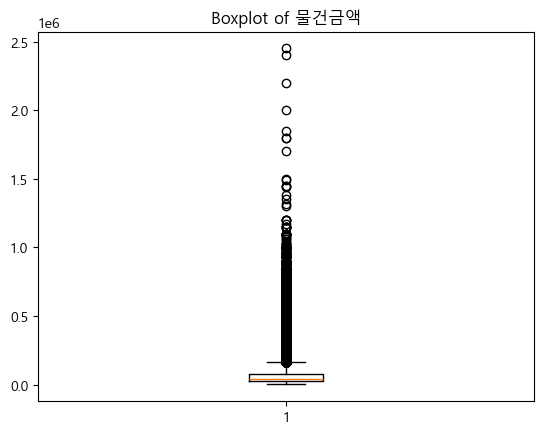

In [397]:


plt.boxplot(df["물건금액"])
plt.title("Boxplot of 물건금액")
plt.show()


### 히스토그램 그려보기

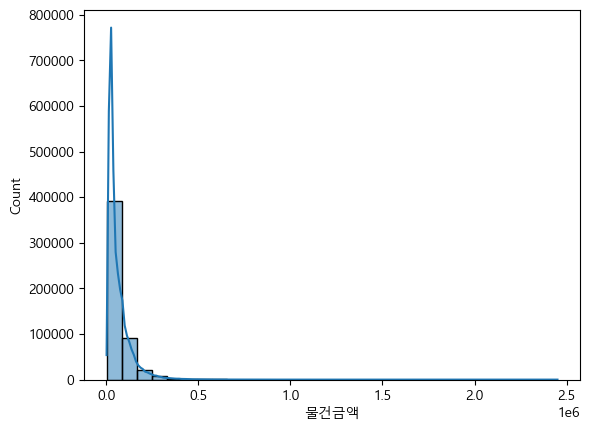

In [399]:
import seaborn as sns

sns.histplot(df["물건금액"], bins=30, kde=True)
plt.show()


### 박스플롯, 히스토그램

In [401]:
df.columns

Index(['접수연도', '자치구코드', '자치구명', '법정동코드', '법정동명', '본번', '부번', '주소', '위도', '경도',
       'geometry', '건물명', '계약일', '물건금액', '건물면적', '토지면적', '층', '건축년도', '건물용도',
       '건물면적정수', '이전 실거래가', '자치구최근6개월거래량', '자치구최근6개월평균금액', '동최근6개월거래량',
       '동최근6개월평균금액', '한국은행 기준금리', '계약연월', '고정형 주택담보대출', '서울5대학군지여부',
       '수도권아파트입주물량', '한강변여부', '최근접역', '최근접역_노선', '최근접역_연결역개수', '최근접역_환승역구분',
       '최근접역_직선거리', '최근접역_도로거리', '면적구분'],
      dtype='object')

In [403]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 저장할 컬럼 리스트 (숫자형 변수만 선택)
columns_to_plot = ["물건금액", "건물면적", "토지면적", "층", "건축년도", "이전 실거래가", "자치구최근6개월거래량", "자치구최근6개월평균금액",
                  "동최근6개월거래량", "동최근6개월평균금액", "한국은행 기준금리", "고정형 주택담보대출", "수도권아파트입주물량", "최근접역_직선거리"]  # 원하는 컬럼 리스트로 변경

# 그래프 저장 폴더 설정
save_path = "C:/ZIPcoding/plots/"
os.makedirs(save_path, exist_ok=True)  # 폴더 없으면 생성

# 각 컬럼에 대해 반복 실행
for column in columns_to_plot:
    # 결측치 제거 (필요한 경우)
    df_clean = df.dropna(subset=[column])

    ## 박스플롯 (Boxplot) 생성 및 저장
    plt.figure(figsize=(6, 5))  # 개별 그래프 크기 설정
    sns.boxplot(y=df_clean[column])
    plt.title(f"{column} Boxplot")
    plt.ylabel(column)
    
    # 박스플롯 저장
    boxplot_filename = f"{save_path}{column}_boxplot.png"
    plt.savefig(boxplot_filename, dpi=300)
    print(f"✅ 저장 완료: {boxplot_filename}")
    plt.close()  # 메모리 절약을 위해 닫기

    ## 히스토그램 (Histogram) 생성 및 저장
    plt.figure(figsize=(6, 5))
    sns.histplot(df_clean[column], bins=30, kde=True)
    plt.title(f"{column} Histogram")
    plt.xlabel(column)

    # 히스토그램 저장
    hist_filename = f"{save_path}{column}_histogram.png"
    plt.savefig(hist_filename, dpi=300)
    print(f"✅ 저장 완료: {hist_filename}")
    plt.close()


✅ 저장 완료: C:/ZIPcoding/plots/물건금액_boxplot.png
✅ 저장 완료: C:/ZIPcoding/plots/물건금액_histogram.png
✅ 저장 완료: C:/ZIPcoding/plots/건물면적_boxplot.png
✅ 저장 완료: C:/ZIPcoding/plots/건물면적_histogram.png
✅ 저장 완료: C:/ZIPcoding/plots/토지면적_boxplot.png
✅ 저장 완료: C:/ZIPcoding/plots/토지면적_histogram.png
✅ 저장 완료: C:/ZIPcoding/plots/층_boxplot.png
✅ 저장 완료: C:/ZIPcoding/plots/층_histogram.png
✅ 저장 완료: C:/ZIPcoding/plots/건축년도_boxplot.png
✅ 저장 완료: C:/ZIPcoding/plots/건축년도_histogram.png
✅ 저장 완료: C:/ZIPcoding/plots/이전 실거래가_boxplot.png
✅ 저장 완료: C:/ZIPcoding/plots/이전 실거래가_histogram.png
✅ 저장 완료: C:/ZIPcoding/plots/자치구최근6개월거래량_boxplot.png
✅ 저장 완료: C:/ZIPcoding/plots/자치구최근6개월거래량_histogram.png
✅ 저장 완료: C:/ZIPcoding/plots/자치구최근6개월평균금액_boxplot.png
✅ 저장 완료: C:/ZIPcoding/plots/자치구최근6개월평균금액_histogram.png
✅ 저장 완료: C:/ZIPcoding/plots/동최근6개월거래량_boxplot.png
✅ 저장 완료: C:/ZIPcoding/plots/동최근6개월거래량_histogram.png
✅ 저장 완료: C:/ZIPcoding/plots/동최근6개월평균금액_boxplot.png
✅ 저장 완료: C:/ZIPcoding/plots/동최근6개월평균금액_histogram.png
✅ 저장 완료: C:/ZIPcoding/plots/

In [407]:
df['층'].value_counts().sort_values()

층
 65        2
 59        3
 56        4
 66        4
-3         4
       ...  
 1     34202
 5     47077
 4     59424
 3     67247
 2     69743
Name: count, Length: 71, dtype: int64